# biosc - diagnostics: isochrones and $A(Li)$ model comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
import pymc as pm
import arviz as az
import bambi as bmb
import xarray as xr
import biosc
import biosc.preprocessing
import matplotlib.ticker as ticker

from pymc import HalfCauchy, Model, Normal, sample

import os
import matplotlib.cm as cm
from netCDF4 import Dataset as NetCDFFile
from scipy.stats import gaussian_kde

from biosc.preprocessing import Preprocessing
from biosc.bhm import BayesianModel

import sys
sys.path.append('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/')

import bmp
from bmp import BayesianModelPlots

In [2]:
plt.rcParams.update({'font.size': 14, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

data_file = 'test_ALi_low_clean_only_good.csv'
file = 'output_test_UCDs_low_clean_only_good_uninf.nc'
path_data = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/test_ALi_low_clean_only_good.csv'
path_models = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'
L = 10
priors = {
    'Age [Myr]': {'dist': 'uniform', 'lower': 60, 'upper': 150},
    'Distance [pc]': {'dist': 'normal', 'mu': 135, 'sigma': 20}
}
ages = [0.02, 0.08, 0.12, 0.5]
colormap = 'turbo'
plot_type = 'all'

bayesian_plots = BayesianModelPlots(data_file, priors, file, path_data, path_models, L, ages, colormap)
bayesian_plots.process_idata(plot_type=plot_type)

In [3]:
Jmag_lbda = 12350.00
Hmag_lbda = 16620.00
Kmag_lbda = 21590.00
BP_lbda = 5109.71
G_lbda = 6217.59
RP_lbda = 7769.02
gmag_lbda = 4849.11
rmag_lbda = 6201.20
wmag_lbda = 6285.91
imag_lbda = 7534.96
zmag_lbda = 8674.20
ymag_lbda = 9627.79


### Pleiades data

In [4]:
data_obs_Pleiades = pd.read_csv('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/Pleiades_DANCe+GDR3+2MASS+PanSTARRS1+A_Li+Lbol.csv')

data_obs_Pleiades.rename(columns={'g_error': 'e_g', 'rp_error': 'e_rp', 'bp_error': 'e_bp'}, inplace=True)
data_obs_Pleiades.columns

Index(['source_id', 'Mecayotl', 'Olivares+2018', 'Meingast+2021', 'l', 'b',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'pmra_pmdec_corr',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'g', 'bp', 'rp', 'e_g',
       'e_bp', 'e_rp', 'dr3_radial_velocity', 'dr3_radial_velocity_error',
       'ruwe', 'astrometric_excess_noise', 'astrometric_params_solved',
       'bp_rp', 'g_rp', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag',
       'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag',
       'ymag', 'e_ymag', 'Name', 'EPIC', 'RAJ2000', 'DEJ2000', 'Vmag', 'J-K',
       'Per', 'Amp', 'l_WLi', 'WLi', 'e_WLi', 'Teff', 'ALi', 'e_ALi', 'Bin',
       'SimbadName', 'Teff_x', 'logg', '[Fe/H]', 'A0', 'AG', 'ABP', 'ARP',
       'E(BP-RP)', 'Rad', 'Li

In [5]:
distance_obs = 1 / (data_obs_Pleiades['parallax'] * 1e-3)
distance_mod_obs = 5 * np.log10(distance_obs) - 5  
data_obs_Pleiades['g_abs'] = data_obs_Pleiades['g'] - distance_mod_obs
data_obs_Pleiades['bp_abs'] = data_obs_Pleiades['bp'] - distance_mod_obs
data_obs_Pleiades['rp_abs'] = data_obs_Pleiades['rp'] - distance_mod_obs
data_obs_Pleiades['Jmag_abs'] = data_obs_Pleiades['Jmag'] - distance_mod_obs
data_obs_Pleiades['Hmag_abs'] = data_obs_Pleiades['Hmag'] - distance_mod_obs
data_obs_Pleiades['Kmag_abs'] = data_obs_Pleiades['Kmag'] - distance_mod_obs
data_obs_Pleiades['rmag_abs'] = data_obs_Pleiades['rmag'] - distance_mod_obs
data_obs_Pleiades['imag_abs'] = data_obs_Pleiades['imag'] - distance_mod_obs
data_obs_Pleiades['ymag_abs'] = data_obs_Pleiades['ymag'] - distance_mod_obs
data_obs_Pleiades['zmag_abs'] = data_obs_Pleiades['zmag'] - distance_mod_obs

In [6]:
data_obs_Pleiades

source_id Mecayotl Olivares+2018 Meingast+2021           l  \
0    66787119410915072     True          True          True  166.210733   
1    64977705525131904     True          True          True  167.014088   
2    65195404530870144     True          True          True  166.401835   
3    64942001460286080     True          True          True  167.530351   
4    64433924008996224     True          True          True  167.187075   
..                 ...      ...           ...           ...         ...   
941  68045583484082048     True          True          True  164.243788   
942  65113559634339200     True          True          True  165.803768   
943  64987876007763968     True          True          True  167.304764   
944  71056252479453056     True          True          True  163.033014   
945  65129506848731136     True          True          True  166.221501   

             b         ra  ra_error        dec  dec_error  ...      g_abs  \
0   -23.276099  56.662143  0.014997  24.520108   0.009073  ...   7.218686   
1   -24.105530  56.647305  0.018675  23.411531   0.012227  ...   8.374874   
2   -23.959280  56.302660  0.187139  23.895691   0.137836  ...  12.716556   
3   -23.713150  57.315181  0.117257  23.380170   0.079404  ...  12.035697   
4   -25.469587  55.777180  0.158969  22.296886   0.108396  ...  12.467287   
..         ...        ...       ...        ...        ...  ...        ...   
941 -25.259933  53.747213  0.023608  24.204450   0.018528  ...   8.972738   
942 -25.252330  54.921665  0.014164  23.290687   0.010935  ...   4.110346   
943 -23.830079  57.063558  0.061383  23.434686   0.049673  ...  10.751044   
944 -22.724805  54.616063  0.095418  26.856932   0.065394  ...  11.189991   
945 -24.634561  55.676696  0.013654  23.502637   0.009224  ...   6.767808   

        bp_abs     rp_abs  Jmag_abs  Hmag_abs  Kmag_abs   rmag_abs   imag_abs  \
0     7.921104   6.408338  5.391857  4.787857  4.635857   7.418857   6.972857   
1     9.401729   7.368198  5.953697  5.236697  5.031697   8.549097   7.790097   
2    14.636861  11.347552  9.255037  8.675037  8.247037  14.008637  12.001337   
3    14.037013  10.698331  8.715933  8.074933  7.819933  13.164333  11.330633   
4    14.587021  11.105957  9.062755  8.470755  8.112755  13.654355  11.738355   
..         ...        ...       ...       ...       ...        ...        ...   
941  10.166610   7.889439  6.446093  5.782093  5.602093   9.355493   8.326793   
942   4.383642   3.672499  3.219775  2.985775  2.933775   4.161775   4.078775   
943  12.369574   9.504058  7.730459  7.171459  6.880459  11.529959  10.045959   
944  13.057157   9.897289  7.997061  7.384061  7.135061  12.175861  10.479061   
945   7.367941   6.021142  4.941914  4.418914  4.272914   6.892914   6.468914   

      ymag_abs   zmag_abs  
0     6.525157   6.694857  
1     7.159997   7.424497  
2    10.590737  11.072637  
3    10.050533  10.483733  
4    10.399955  10.850355  
..         ...        ...  
941   7.636193   7.872993  
942   4.069775   4.064775  
943   9.017459   9.351059  
944   9.307561   9.688561  
945   6.072914   6.199914  

[946 rows x 92 columns]

In [7]:
np.mean(data_obs_Pleiades['ALi'])

2.227078431372549

In [8]:
#sigma = 5.67e-8  # W/m²/K⁴
solar_abundance = 1.05
e_solar_abundance = 0.10
Tsun = 5772
Zsun = 0.01524
#Asplund et al. 2009

data_obs_Pleiades['Lsun'] = data_obs_Pleiades['Rad']**2 * (data_obs_Pleiades['Teff_x']/Tsun)**4 #883

### PARSEC

In [126]:
lib = ['Gaia', '2MASS', 'PanSTARRS']

PARSEC_iso_omega_00_Phot = {}

for l in lib:
    data = np.loadtxt('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/PARSEC_iso_omega_00_'+l+'.dat')
    
    # Leer la fila 15 para obtener los nombres de las columnas
    with open('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/PARSEC_iso_omega_00_'+l+'.dat', 'r') as file:
        for i, line in enumerate(file):
            if i == 14:
                columns = line.strip().lstrip('#').split()
                break
    
    # Crear un DataFrame con los datos y los nombres de las columnas
    dataframe = pd.DataFrame(data, columns=columns)
    
    dataframe.rename(columns={'Mass': 'M/Ms'}, inplace=True)
    
    # Guardar el DataFrame en el diccionario con el nombre correspondiente
    PARSEC_iso_omega_00_Phot[l] = dataframe
    
    PARSEC_iso_omega_00_Phot[l]['Age [Gyr]'] = (10**(PARSEC_iso_omega_00_Phot[l]['logAge']))/(1e9)
    
common_columns = PARSEC_iso_omega_00_Phot['Gaia'].columns[:35]

dataframes_concatenate = [df for df in PARSEC_iso_omega_00_Phot.values()]

dataframe_final = pd.concat(dataframes_concatenate, axis=1)

dataframe_final = dataframe_final.loc[:,~dataframe_final.columns.duplicated()]

dataframe_final.to_csv('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/PARSEC_iso_omega_00_Phot.csv', index=False)

PARSEC_iso_omega_00_Phot_dict = {}

for age in dataframe_final['Age [Gyr]'].unique():
    dataframe_by_age = dataframe_final[dataframe_final['Age [Gyr]'] == age]
    dataframe_by_age = dataframe_by_age.loc[dataframe_by_age['G_i00'] > 0].reset_index(drop=True)
    dataframe_by_age['Teff'] = 10**dataframe_by_age['logTe']
    dataframe_by_age['Lsun'] = 10**dataframe_by_age['logL']
    PARSEC_iso_omega_00_Phot_dict[age] = dataframe_by_age


In [127]:
dataframe_final

Zini   MH   logAge      Mini   int_IMF   M/Ms   logL   logTe   logg  \
0      0.01471  0.0  6.30103  0.090000  1.081690  0.090 -1.379  3.4384  3.477   
1      0.01471  0.0  6.30103  0.097813  1.152571  0.098 -1.307  3.4443  3.465   
2      0.01471  0.0  6.30103  0.100000  1.171106  0.100 -1.288  3.4459  3.462   
3      0.01471  0.0  6.30103  0.100258  1.173256  0.100 -1.286  3.4461  3.461   
4      0.01471  0.0  6.30103  0.109296  1.244379  0.109 -1.224  3.4508  3.455   
...        ...  ...      ...       ...       ...    ...    ...     ...    ...   
41620  0.01471  0.0  8.77597  2.692088  2.589498  2.690  2.284  3.6668  2.203   
41621  0.01471  0.0  8.77597  2.692170  2.589500  2.690  2.276  3.6678  2.215   
41622  0.01471  0.0  8.77597  2.692199  2.589501  2.690  2.250  3.6700  2.249   
41623  0.01471  0.0  8.77597  2.692242  2.589502  2.690  2.217  3.6727  2.294   
41624  0.01471  0.0  8.77597  2.692394  2.589505  2.690  2.213  3.6727  2.297   

       label  ...  wP1_i45  wP1_i50  wP1_i55  wP1_i60  wP1_i65  wP1_i70  \
0        0.0  ...   10.378   10.378   10.378   10.378   10.378   10.378   
1        0.0  ...   10.112   10.112   10.112   10.112   10.112   10.112   
2        0.0  ...   10.042   10.042   10.042   10.042   10.042   10.042   
3        0.0  ...   10.035   10.035   10.035   10.035   10.035   10.035   
4        0.0  ...    9.811    9.811    9.811    9.811    9.811    9.811   
...      ...  ...      ...      ...      ...      ...      ...      ...   
41620    7.0  ...   -0.810   -0.810   -0.810   -0.810   -0.810   -0.810   
41621    7.0  ...   -0.793   -0.793   -0.793   -0.793   -0.793   -0.793   
41622    7.0  ...   -0.737   -0.737   -0.737   -0.737   -0.737   -0.737   
41623    7.0  ...   -0.663   -0.663   -0.663   -0.663   -0.663   -0.663   
41624    7.0  ...   -0.653   -0.653   -0.653   -0.653   -0.653   -0.653   

       wP1_i75  wP1_i80  wP1_i85  wP1_i90  
0       10.378   10.378   10.378   10.378  
1       10.112   10.112   10.112   10.112  
2       10.042   10.042   10.042   10.042  
3       10.035   10.035   10.035   10.035  
4        9.811    9.811    9.811    9.811  
...        ...      ...      ...      ...  
41620   -0.810   -0.810   -0.810   -0.810  
41621   -0.793   -0.793   -0.793   -0.793  
41622   -0.737   -0.737   -0.737   -0.737  
41623   -0.663   -0.663   -0.663   -0.663  
41624   -0.653   -0.653   -0.653   -0.653  

[41625 rows x 312 columns]

In [128]:
dataframe_final['Z']

0        0.01476
1        0.01476
2        0.01476
3        0.01476
4        0.01476
          ...   
41620    0.01487
41621    0.01487
41622    0.01487
41623    0.01487
41624    0.01487
Name: Z, Length: 41625, dtype: float64

In [129]:
dataframe_final['Y']

0        0.2745
1        0.2745
2        0.2745
3        0.2745
4        0.2745
          ...  
41620    0.3042
41621    0.3042
41622    0.3042
41623    0.3042
41624    0.3042
Name: Y, Length: 41625, dtype: float64

In [130]:
10**dataframe_final['logAge'][5]

2000000.0199681043

In [131]:
10**dataframe_final['logAge'][346]

7000031.591308976

In [132]:
10**dataframe_final['logAge'][346]-10**dataframe_final['logAge'][345]

5000031.571340871

In [133]:
10**dataframe_final['logAge'][41624]

596994046.2717156

In [134]:
10**dataframe_final['logAge'][706]-10**dataframe_final['logAge'][346]

4999933.979172183

In [135]:
print(PARSEC_iso_omega_00_Phot['Gaia'].columns.tolist())

['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'M/Ms', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2', 'period3', 'period4', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'Teff0', 'omega', 'angvel', 'vtaneq', 'angmom', 'Rpol', 'Req', 'mbolmag', 'G_fSBmag', 'G_BP_fSBmag', 'G_RP_fSBmag', 'G_fSB', 'G_f0', 'G_fk', 'G_i00', 'G_i05', 'G_i10', 'G_i15', 'G_i20', 'G_i25', 'G_i30', 'G_i35', 'G_i40', 'G_i45', 'G_i50', 'G_i55', 'G_i60', 'G_i65', 'G_i70', 'G_i75', 'G_i80', 'G_i85', 'G_i90', 'G_BP_fSB', 'G_BP_f0', 'G_BP_fk', 'G_BP_i00', 'G_BP_i05', 'G_BP_i10', 'G_BP_i15', 'G_BP_i20', 'G_BP_i25', 'G_BP_i30', 'G_BP_i35', 'G_BP_i40', 'G_BP_i45', 'G_BP_i50', 'G_BP_i55', 'G_BP_i60', 'G_BP_i65', 'G_BP_i70', 'G_BP_i75', 'G_BP_i80', 'G_BP_i85', 'G_BP_i90', 'G_RP_fSB', 'G_RP_f0', 'G_RP_fk', 'G_RP_i00', 'G_RP_i05', 'G_RP_i10', 'G_RP_i15', 'G_RP_i20', 'G_RP_i25', 'G_RP_i30', 'G_RP_i35', 'G_RP_i40', 'G_RP_i45', 'G_RP_i50', 'G_RP_i55', 'G_RP_i60', 'G_RP_

In [136]:
PARSEC_iso_omega_00_Phot_dict = {round(key, 3): value for key, value in PARSEC_iso_omega_00_Phot_dict.items()}


In [137]:
PARSEC_iso_omega_00_Phot_dict.keys()

dict_keys([0.002, 0.007, 0.012, 0.017, 0.022, 0.027, 0.032, 0.037, 0.042, 0.047, 0.052, 0.057, 0.062, 0.067, 0.072, 0.077, 0.082, 0.087, 0.092, 0.097, 0.102, 0.107, 0.112, 0.117, 0.122, 0.127, 0.132, 0.137, 0.142, 0.147, 0.152, 0.157, 0.162, 0.167, 0.172, 0.177, 0.182, 0.187, 0.192, 0.197, 0.202, 0.207, 0.212, 0.217, 0.222, 0.227, 0.232, 0.237, 0.242, 0.247, 0.252, 0.257, 0.262, 0.267, 0.272, 0.277, 0.282, 0.287, 0.292, 0.297, 0.302, 0.307, 0.312, 0.317, 0.322, 0.327, 0.332, 0.337, 0.342, 0.347, 0.352, 0.357, 0.362, 0.367, 0.372, 0.377, 0.382, 0.387, 0.392, 0.397, 0.402, 0.407, 0.412, 0.417, 0.422, 0.427, 0.432, 0.437, 0.442, 0.447, 0.452, 0.457, 0.462, 0.467, 0.472, 0.477, 0.482, 0.487, 0.492, 0.497, 0.502, 0.507, 0.512, 0.517, 0.522, 0.527, 0.532, 0.537, 0.542, 0.547, 0.552, 0.557, 0.562, 0.567, 0.572, 0.577, 0.582, 0.587, 0.592, 0.597])

In [138]:
PARSEC_iso_omega_00_Phot_dict[0.122]

Zini   MH   logAge      Mini   int_IMF   M/Ms   logL   logTe   logg  \
0    0.01471  0.0  8.08636  0.090000  1.081690  0.090 -2.818  3.4010  4.766   
1    0.01471  0.0  8.08636  0.091255  1.093600  0.091 -2.808  3.4024  4.768   
2    0.01471  0.0  8.08636  0.098871  1.161602  0.099 -2.744  3.4117  4.776   
3    0.01471  0.0  8.08636  0.100000  1.171106  0.100 -2.735  3.4131  4.777   
4    0.01471  0.0  8.08636  0.100865  1.178290  0.101 -2.729  3.4140  4.778   
..       ...  ...      ...       ...       ...    ...    ...     ...    ...   
120  0.01471  0.0  8.08636  2.699229  2.589651  2.699  1.794  4.0560  4.252   
121  0.01471  0.0  8.08636  2.800000  2.591712  2.800  1.862  4.0656  4.238   
122  0.01471  0.0  8.08636  3.000000  2.595334  3.000  1.992  4.0829  4.207   
123  0.01471  0.0  8.08636  3.181551  2.598173  3.181  2.105  4.0971  4.176   
124  0.01471  0.0  8.08636  3.200000  2.598441  3.199  2.116  4.0984  4.172   

     label  ...  wP1_i55  wP1_i60  wP1_i65  wP1_i70  wP1_i75  wP1_i80  \
0      0.0  ...   14.470   14.470   14.470   14.470   14.470   14.470   
1      0.0  ...   14.445   14.445   14.445   14.445   14.445   14.445   
2      0.0  ...   14.267   14.267   14.267   14.267   14.267   14.267   
3      0.0  ...   14.229   14.229   14.229   14.229   14.229   14.229   
4      0.0  ...   14.205   14.205   14.205   14.205   14.205   14.205   
..     ...  ...      ...      ...      ...      ...      ...      ...   
120    1.0  ...    0.913    0.913    0.913    0.913    0.913    0.913   
121    1.0  ...    0.792    0.792    0.792    0.792    0.792    0.792   
122    1.0  ...    0.560    0.560    0.560    0.560    0.560    0.560   
123    1.0  ...    0.356    0.356    0.356    0.356    0.356    0.356   
124    1.0  ...    0.334    0.334    0.334    0.334    0.334    0.334   

     wP1_i85  wP1_i90          Teff        Lsun  
0     14.470   14.470   2517.676928    0.001521  
1     14.445   14.445   2525.806055    0.001556  
2     14.267   14.267   2580.477044    0.001803  
3     14.229   14.229   2588.808942    0.001841  
4     14.205   14.205   2594.179362    0.001866  
..       ...      ...           ...         ...  
120    0.913    0.913  11376.272858   62.230029  
121    0.792    0.792  11630.543233   72.777980  
122    0.560    0.560  12103.194151   98.174794  
123    0.356    0.356  12505.469461  127.350308  
124    0.334    0.334  12542.958923  130.617089  

[125 rows x 314 columns]

In [139]:
PARSEC_iso_omega_00_Phot_dict[0.122]['Y']

0      0.2745
1      0.2745
2      0.2745
3      0.2745
4      0.2745
        ...  
120    0.2746
121    0.2746
122    0.2746
123    0.2746
124    0.2746
Name: Y, Length: 125, dtype: float64

In [140]:
PARSEC_iso_omega_00_Phot_dict[0.122]['Z']

0      0.01476
1      0.01476
2      0.01476
3      0.01476
4      0.01476
        ...   
120    0.01476
121    0.01476
122    0.01476
123    0.01476
124    0.01476
Name: Z, Length: 125, dtype: float64

In [141]:
Zini = 0.01471

Yini = 0.2485 + 1.78*Zini
Yini

0.2746838

In [142]:
lib = ['Gaia', '2MASS', 'PanSTARRS']

PARSEC_iso_omega_00_sun_Phot = {}

for l in lib:
    data = np.loadtxt('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/PARSEC_iso_omega_00_sun_'+l+'.dat')
    
    # Leer la fila 15 para obtener los nombres de las columnas
    with open('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/PARSEC_iso_omega_00_'+l+'.dat', 'r') as file:
        for i, line in enumerate(file):
            if i == 14:
                columns = line.strip().lstrip('#').split()
                break
    
    # Crear un DataFrame con los datos y los nombres de las columnas
    dataframe = pd.DataFrame(data, columns=columns)
    
    dataframe.rename(columns={'Mass': 'M/Ms'}, inplace=True)
    
    # Guardar el DataFrame en el diccionario con el nombre correspondiente
    PARSEC_iso_omega_00_sun_Phot[l] = dataframe
    
    PARSEC_iso_omega_00_sun_Phot[l]['Age [Gyr]'] = (10**(PARSEC_iso_omega_00_sun_Phot[l]['logAge']))/(1e9)
    
common_columns = PARSEC_iso_omega_00_sun_Phot['Gaia'].columns[:35]

dataframes_concatenate = [df for df in PARSEC_iso_omega_00_sun_Phot.values()]

dataframe_final = pd.concat(dataframes_concatenate, axis=1)

dataframe_final = dataframe_final.loc[:,~dataframe_final.columns.duplicated()]

dataframe_final.to_csv('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/PARSEC_iso_omega_00_Phot.csv', index=False)

PARSEC_iso_omega_00_sun_Phot_dict = {}

for age in dataframe_final['Age [Gyr]'].unique():
    dataframe_by_age = dataframe_final[dataframe_final['Age [Gyr]'] == age]
    dataframe_by_age = dataframe_by_age.loc[dataframe_by_age['G_i00'] > 0].reset_index(drop=True)
    dataframe_by_age['Teff'] = 10**dataframe_by_age['logTe']
    dataframe_by_age['Lsun'] = 10**dataframe_by_age['logL']
    PARSEC_iso_omega_00_sun_Phot_dict[round(age,3)] = dataframe_by_age


In [143]:
PARSEC_iso_omega_00_sun_Phot_dict[0.122]

Zini      MH   logAge      Mini   int_IMF   M/Ms   logL   logTe  \
0    0.00713 -0.3272  8.08636  0.090000  1.081690  0.090 -2.769  3.4339   
1    0.00713 -0.3272  8.08636  0.090711  1.088470  0.091 -2.764  3.4346   
2    0.00713 -0.3272  8.08636  0.096212  1.138659  0.096 -2.721  3.4400   
3    0.00713 -0.3272  8.08636  0.099697  1.168569  0.100 -2.694  3.4436   
4    0.00713 -0.3272  8.08636  0.105658  1.216707  0.106 -2.653  3.4488   
..       ...     ...      ...       ...       ...    ...    ...     ...   
160  0.00713 -0.3272  8.08636  3.026102  2.595767  3.025  2.093  4.1248   
161  0.00713 -0.3272  8.08636  3.171499  2.598026  3.170  2.183  4.1354   
162  0.00713 -0.3272  8.08636  3.181142  2.598167  3.180  2.189  4.1361   
163  0.00713 -0.3272  8.08636  3.362140  2.600650  3.360  2.297  4.1477   
164  0.00713 -0.3272  8.08636  3.368611  2.600733  3.366  2.301  4.1481   

      logg  label  ...  wP1_i55  wP1_i60  wP1_i65  wP1_i70  wP1_i75  wP1_i80  \
0    4.849    0.0  ...   13.741   13.741   13.741   13.741   13.741   13.741   
1    4.850    0.0  ...   13.717   13.717   13.717   13.717   13.717   13.717   
2    4.855    0.0  ...   13.526   13.526   13.526   13.526   13.526   13.526   
3    4.857    0.0  ...   13.404   13.404   13.404   13.404   13.404   13.404   
4    4.862    0.0  ...   13.224   13.224   13.224   13.224   13.224   13.224   
..     ...    ...  ...      ...      ...      ...      ...      ...      ...   
160  4.277    1.0  ...    0.568    0.568    0.568    0.568    0.568    0.568   
161  4.250    1.0  ...    0.405    0.405    0.405    0.405    0.405    0.405   
162  4.248    1.0  ...    0.394    0.394    0.394    0.394    0.394    0.394   
163  4.210    1.0  ...    0.191    0.191    0.191    0.191    0.191    0.191   
164  4.209    1.0  ...    0.184    0.184    0.184    0.184    0.184    0.184   

     wP1_i85  wP1_i90          Teff        Lsun  
0     13.741   13.741   2715.813858    0.001702  
1     13.717   13.717   2720.194762    0.001722  
2     13.526   13.526   2754.228703    0.001901  
3     13.404   13.404   2777.154236    0.002023  
4     13.224   13.224   2810.606200    0.002223  
..       ...      ...           ...         ...  
160    0.568    0.568  13329.074642  123.879659  
161    0.405    0.405  13658.405431  152.405275  
162    0.394    0.394  13680.437931  154.525444  
163    0.191    0.191  14050.765963  198.152703  
164    0.184    0.184  14063.713158  199.986187  

[165 rows x 314 columns]

In [144]:
PARSEC_iso_omega_00_sun_Phot_dict[0.122]['Y']

0      0.2615
1      0.2615
2      0.2615
3      0.2615
4      0.2615
        ...  
160    0.2614
161    0.2614
162    0.2614
163    0.2614
164    0.2614
Name: Y, Length: 165, dtype: float64

In [145]:
PARSEC_iso_omega_00_sun_Phot_dict[0.122]['Z']

0      0.0072
1      0.0072
2      0.0072
3      0.0072
4      0.0072
        ...  
160    0.0072
161    0.0072
162    0.0072
163    0.0072
164    0.0072
Name: Z, Length: 165, dtype: float64

In [146]:
PARSEC_iso_omega_00_Phot_dict = {round(key, 3): value for key, value in PARSEC_iso_omega_00_Phot_dict.items()}
PARSEC_iso_omega_00_sun_Phot_dict = {round(key, 3): value for key, value in PARSEC_iso_omega_00_sun_Phot_dict.items()}


In [147]:
PARSEC_iso_omega_00_sun_Phot_dict.keys()

dict_keys([0.002, 0.007, 0.012, 0.017, 0.022, 0.027, 0.032, 0.037, 0.042, 0.047, 0.052, 0.057, 0.062, 0.067, 0.072, 0.077, 0.082, 0.087, 0.092, 0.097, 0.102, 0.107, 0.112, 0.117, 0.122, 0.127, 0.132, 0.137, 0.142, 0.147, 0.152, 0.157, 0.162, 0.167, 0.172, 0.177, 0.182, 0.187, 0.192, 0.197, 0.202, 0.207, 0.212, 0.217, 0.222, 0.227, 0.232, 0.237, 0.242, 0.247, 0.252, 0.257, 0.262, 0.267, 0.272, 0.277, 0.282, 0.287, 0.292, 0.297, 0.302, 0.307, 0.312, 0.317, 0.322, 0.327, 0.332, 0.337, 0.342, 0.347, 0.352, 0.357, 0.362, 0.367, 0.372, 0.377, 0.382, 0.387, 0.392, 0.397, 0.402, 0.407, 0.412, 0.417, 0.422, 0.427, 0.432, 0.437, 0.442, 0.447, 0.452, 0.457, 0.462, 0.467, 0.472, 0.477, 0.482, 0.487, 0.492, 0.497, 0.502, 0.507, 0.512, 0.517, 0.522, 0.527, 0.532, 0.537, 0.542, 0.547, 0.552, 0.557, 0.562, 0.567, 0.572, 0.577, 0.582, 0.587, 0.592, 0.597])

In [148]:
Zini = 0.00713

Yini = 0.2485 + 1.78*Zini
Yini

0.2611914

In [149]:
max(10**dataframe_final['logTe'])

31145.83654012135

In [150]:
min(10**dataframe_final['logTe'])

2518.2567110425944

### BT-Settl

In [151]:
path_models = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'


In [152]:
BTSettl = pd.read_csv(path_models)
BTSettl

age_Myr  t(Gyr)   M/Ms  Teff(K)  L/Ls  lg(g)  R(Gcm)     D      Li  \
0        1.0   0.001  0.010   2345.0 -2.70   3.57   18.99  1.00  1.0000   
1        1.0   0.001  0.015   2504.0 -2.42   3.58   22.90  1.00  1.0000   
2        1.0   0.001  0.020   2598.0 -2.25   3.59   26.11  1.00  1.0000   
3        1.0   0.001  0.030   2710.0 -1.98   3.57   32.78  1.00  1.0000   
4        1.0   0.001  0.040   2779.0 -1.81   3.57   37.62  0.99  1.0000   
..       ...     ...    ...      ...   ...    ...     ...   ...     ...   
833  10000.0  10.000  0.500   3689.0 -1.43   4.78   33.05  0.00  0.0000   
834  10000.0  10.000  0.600   4013.0 -1.12   4.70   39.92  0.00  0.0000   
835  10000.0  10.000  0.700   4493.0 -0.79   4.63   46.43  0.00  0.0000   
836  10000.0  10.000  0.800   5002.0 -0.47   4.55   54.44  0.00  0.0000   
837  10000.0  10.000  0.900   5495.0 -0.12   4.42   67.60  0.00  0.0626   

          G       G_BP     G_RP      J      H      K    g_p1    r_p1    i_p1  \
0    14.055  17.784799  12.4668  9.328  8.770  8.353  17.937  17.095  13.757   
1    13.015  16.269800  11.4758  8.667  8.135  7.751  16.291  15.787  12.540   
2    12.381  15.366800  10.8708  8.238  7.710  7.347  15.366  14.935  11.827   
3    11.507  14.182800  10.0358  7.582  7.054  6.720  14.194  13.747  10.885   
4    10.990  13.496800   9.5408  7.188  6.652  6.338  13.512  13.061  10.339   
..      ...        ...      ...    ...    ...    ...     ...     ...     ...   
833   8.937   9.932800   7.9128  6.589  5.944  5.721  10.162   9.297   8.342   
834   7.960   8.747800   7.0678  5.926  5.237  5.059   9.010   8.100   7.463   
835   6.900   7.487800   6.1598  5.244  4.614  4.490   7.754   6.870   6.537   
836   5.925   6.365800   5.3108  4.580  4.098  4.000   6.529   5.885   5.675   
837   4.972   5.317800   4.4508  3.860  3.490  3.410   5.422   4.944   4.804   

       y_p1    z_p1  
0    12.125  11.009  
1    11.155  10.214  
2    10.566   9.722  
3     9.754   9.006  
4     9.275   8.580  
..      ...     ...  
833   7.936   7.713  
834   7.188   7.015  
835   6.392   6.271  
836   5.594   5.525  
837   4.769   4.741  

[838 rows x 20 columns]

In [153]:
min(BTSettl['Teff(K)'])

1206.0

In [154]:
max(BTSettl['Teff(K)'])

6768.0

In [155]:
BTSettl.rename(columns={
    'age_Myr': 'age_Gyr',
    'Teff(K)': 'Teff',
    'L/Ls': 'Lsun',
    'G_RP': 'RP',
    'G_BP': 'BP',
    'r_p1': 'r',
    'i_p1': 'i',
    'y_p1': 'y',
    'z_p1': 'z'}, inplace=True)

BTSettl['age_Gyr'] *= 0.001
BTSettl['A(Li)'] = np.log10(BTSettl['Li']) + 3.3
BTSettl['Lsun'] = 10**BTSettl['Lsun']


# Create a dictionary to store dataframes for each isochrone
BTSettl_Li_isochrones = {}

# Loop over each row in the model dataframe
for index, row in BTSettl.iterrows():
    # Get the value of age_Gyr from the current row
    age_Gyr = row['age_Gyr']

    # Check if the value of age_Gyr already exists as a key in the dictionary
    if age_Gyr not in BTSettl_Li_isochrones:
        # If it doesn't exist, create a new entry in the dictionary with the value of age_Gyr as the key
        BTSettl_Li_isochrones[age_Gyr] = []

    # Add the current row to the corresponding value of age_Gyr in the dictionary
    BTSettl_Li_isochrones[age_Gyr].append(row)

# Convert each list of rows into a dataframe and replace the list in the dictionary
for age_Gyr, rows in BTSettl_Li_isochrones.items():
    BTSettl_Li_isochrones[age_Gyr] = pd.DataFrame(rows)



/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/biosc_env/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [156]:
BTSettl_Li_isochrones.keys()

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

In [157]:
BTSettl_Li_isochrones[0.08]

age_Gyr  t(Gyr)   M/Ms    Teff      Lsun  lg(g)  R(Gcm)    D      Li  \
413     0.08    0.08  0.015  1372.0  0.000055   4.37    9.27  0.0  1.0000   
414     0.08    0.08  0.020  1489.0  0.000072   4.52    8.96  0.0  1.0000   
415     0.08    0.08  0.030  2047.0  0.000263   4.69    9.04  0.0  1.0000   
416     0.08    0.08  0.040  2387.0  0.000550   4.75    9.66  0.0  1.0000   
417     0.08    0.08  0.050  2586.0  0.000871   4.79   10.37  0.0  0.9990   
418     0.08    0.08  0.060  2709.0  0.001202   4.81   11.06  0.0  0.9850   
419     0.08    0.08  0.070  2829.0  0.001660   4.82   11.84  0.0  0.8640   
420     0.08    0.08  0.072  2845.0  0.001738   4.82   11.98  0.0  0.8010   
421     0.08    0.08  0.075  2869.0  0.001862   4.82   12.21  0.0  0.6800   
422     0.08    0.08  0.080  2905.0  0.002042   4.83   12.58  0.0  0.4070   
423     0.08    0.08  0.090  2962.0  0.002512   4.83   13.30  0.0  0.0197   
424     0.08    0.08  0.100  3010.0  0.002884   4.84   13.92  0.0  0.0000   
425     0.08    0.08  0.200  3275.0  0.008318   4.82   19.98  0.0  0.0000   
426     0.08    0.08  0.300  3406.0  0.015136   4.81   24.88  0.0  0.0000   
427     0.08    0.08  0.400  3522.0  0.024547   4.78   29.51  0.0  0.0000   
428     0.08    0.08  0.500  3668.0  0.039811   4.74   34.80  0.0  0.0000   
429     0.08    0.08  0.600  4039.0  0.081283   4.68   40.92  0.0  0.0000   
430     0.08    0.08  0.700  4497.0  0.147911   4.67   44.58  0.0  0.0000   
431     0.08    0.08  0.800  4830.0  0.245471   4.64   49.44  0.0  0.0048   
432     0.08    0.08  0.900  5212.0  0.426580   4.58   56.04  0.0  0.0825   
433     0.08    0.08  1.000  5533.0  0.676083   4.52   63.21  0.0  0.3070   
434     0.08    0.08  1.100  5876.0  1.122018   4.46   71.48  0.0  0.5740   
435     0.08    0.08  1.200  6164.0  1.737801   4.39   80.81  0.0  0.7700   
436     0.08    0.08  1.300  6451.0  2.570396   4.33   90.02  0.0  0.8800   
437     0.08    0.08  1.400  6766.0  3.630781   4.29   97.57  0.0  0.9380   

             G  ...         RP       J       H       K    g_p1       r  \
413  18.989000  ...  17.337799  13.908  12.584  11.858  24.678  21.378   
414  18.673999  ...  17.123801  13.846  12.482  11.568  23.584  20.346   
415  16.920000  ...  15.296800  11.571  10.822  10.415  21.883  19.166   
416  15.312000  ...  13.720800  10.695  10.116   9.778  19.737  17.984   
417  14.424000  ...  12.887800  10.248   9.681   9.358  18.124  16.974   
418  13.815000  ...  12.336800   9.942   9.366   9.055  16.715  16.015   
419  13.279000  ...  11.846800   9.654   9.083   8.780  15.923  15.103   
420  13.212000  ...  11.783800   9.610   9.038   8.738  15.831  15.005   
421  13.110000  ...  11.687800   9.541   8.969   8.673  15.693  14.858   
422  12.952000  ...  11.539800   9.434   8.862   8.571  15.478  14.632   
423  12.668000  ...  11.277800   9.245   8.672   8.390  15.053  14.236   
424  12.428000  ...  11.059800   9.090   8.515   8.240  14.676  13.886   
425  10.925000  ...   9.707800   8.052   7.453   7.201  12.531  11.779   
426  10.155000  ...   8.998800   7.457   6.845   6.602  11.618  10.825   
427   9.539000  ...   8.434800   6.984   6.359   6.122  10.897  10.076   
428   8.874000  ...   7.838800   6.496   5.849   5.624  10.115   9.261   
429   7.869000  ...   6.979800   5.851   5.159   4.985   8.928   7.993   
430   6.982000  ...   6.242800   5.329   4.701   4.577   7.835   6.952   
431   6.330000  ...   5.676800   4.889   4.360   4.255   7.008   6.288   
432   5.644000  ...   5.070800   4.404   3.973   3.884   6.176   5.608   
433   5.084000  ...   4.568800   3.988   3.624   3.546   5.526   5.057   
434   4.530000  ...   4.069800   3.570   3.272   3.203   4.893   4.513   
435   4.048000  ...   3.632800   3.194   2.942   2.877   4.352   4.041   
436   3.612000  ...   3.242800   2.858   2.648   2.588   3.863   3.616   
437   3.232000  ...   2.911800   2.581   2.413   2.357   3.427   3.248   

          i       y       z     A(Li)  
413  19.516  16.866  15.762  3.300000

In [158]:
max(BTSettl_Li_isochrones[0.120]['Teff'])

6767.0

In [159]:
min(BTSettl_Li_isochrones[0.120]['Teff'])

1304.0

### MIST

In [160]:
import sys
sys.path.append('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/')

import read_mist_models

import shutil

import os


def isocmd_to_dataframe(isocmd_set, ages):
    data_dict = {}
    for age, isocmd in zip(ages, isocmd_set):
        data_dict[age] = pd.DataFrame(isocmd)
    return data_dict

def iso_to_dataframe(iso_set, ages):
    data_dict = {}
    for age, iso in zip(ages, iso_set):
        data_dict[age] = pd.DataFrame(iso)
    return data_dict

column_mapping = {
    'star_mass': 'M/Ms',
    'Gaia_G_EDR3': 'G',
    'Gaia_BP_EDR3': 'BP',
    'Gaia_RP_EDR3': 'RP',
    '2MASS_J': 'J',
    '2MASS_H': 'H',
    '2MASS_Ks': 'K',
    'PS_g': 'g',
    'PS_r': 'r',
    'PS_i': 'i',
    'PS_z': 'z',
    'PS_y': 'y',
    'PS_w': 'w'
}


def files_show(path):
    if os.path.isdir(path):
        files = os.listdir(path)
        for file in files:
            print(file)
    else:
        print('Error')
        
        
def PG2_files(vvcrit):
    
    vvcrit = str(vvcrit)
    
    path_G2 = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_vvcrit'+vvcrit+'_UBVRIplus/'

    files_show(path_G2)

    path_P = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_vvcrit'+vvcrit+'_PanSTARRS/'

    files_show(path_P)
    
    path = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_vvcrit'+vvcrit+'_full_isos/'

    files_show(path)
    
    return path_G2, path_P, path
        
PG2_files(0.0)



def file_copy(phot, vvcrit, feh):
    
    vvcrit = str(vvcrit)
    
    source_directory = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_vvcrit'+vvcrit+'_'+phot+'/'
    target_directory = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/'
    
    file_name = 'MIST_v1.2_feh_'+feh+'_afe_p0.0_vvcrit0.0_'+phot+'.iso.cmd'
    
    source_path = os.path.join(source_directory, file_name)
    
    file_name = os.path.basename(source_path)
    
    target_path = os.path.join(target_directory, file_name)
    
    shutil.copy(source_path, target_path)


phot = 'UBVRIplus'

feh = 'm0.25'

vvcrit = 0.0
    
file_copy(phot, vvcrit, feh)



MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.0_PanSTARRS.iso.cmd
MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.0_PanSTARRS.iso.cmd
MIST_v1.2_feh_m2.00_afe_p0.0_vv

[Fe/H] for Pleiades: +0.042 (Soderblom et al. 2009).

In [176]:
class ISO:
    """
    Reads in MIST isochrone files.
    """
    def __init__(self, filename, verbose=True):
        """
        Args:
            filename: the name of .iso file.
        """
        self.filename = filename
        if verbose:
            print('Reading in: ' + self.filename)
        self.version, self.abun, self.rot, self.ages, self.num_ages, self.hdr_list, self.isos = self.read_iso_file()

    def read_iso_file(self):
        """
        Reads in the isochrone file.
        """
        # Open file and read it in
        with open(self.filename) as f:
            content = [line.split() for line in f]
        version = {'MIST': content[0][-1], 'MESA': content[1][-1]}
        abun = {content[3][i]: float(content[4][i]) for i in range(1, 5)}
        rot = float(content[4][-1])
        num_ages = int(content[6][-1])

        # Read one block for each isochrone
        iso_set = []
        ages = []
        counter = 0
        data = content[8:]
        for i_age in range(num_ages):
            # Grab info for each isochrone
            num_eeps = int(data[counter][-2])
            num_cols = int(data[counter][-1])
            hdr_list = data[counter + 2][1:]
            formats = tuple([np.int32] + [np.float64 for i in range(num_cols - 1)])
            iso = np.zeros((num_eeps), {'names': tuple(hdr_list), 'formats': tuple(formats)})
            # Read through EEPs for each isochrone
            for eep in range(num_eeps):
                iso_chunk = data[3 + counter + eep]
                iso[eep] = tuple(iso_chunk)
            iso_set.append(iso)
            ages.append(iso[0][1])
            counter += 3 + num_eeps + 2
        return version, abun, rot, ages, num_ages, hdr_list, iso_set

    def age_index(self, age):
        """
        Returns the index for the user-specified age.
        """
        diff_arr = abs(np.array(self.ages) - age)
        age_index = np.where(diff_arr == min(diff_arr))[0][0]
        if ((age > max(self.ages)) or (age < min(self.ages))):
            print('The requested age is outside the range. Try between ' + str(min(self.ages)) + ' and ' + str(
                max(self.ages)))
        return age_index
    
def read_iso(phot_G2, phot_P, vvcrit, feh):
    
    vvcrit = str(vvcrit)
    
    filename_iso_G2 = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_'+feh+'_afe_p0.0_vvcrit'+vvcrit+'_'+phot_G2+'.iso.cmd'
    filename_iso_P = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_'+feh+'_afe_p0.0_vvcrit'+vvcrit+'_'+phot_P+'.iso.cmd'
    filename_iso_full = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_vvcrit0.0_full_isos/MIST_v1.2_feh_'+feh+'_afe_p0.0_vvcrit'+vvcrit+'_full.iso'
    
    iso_P = read_mist_models.ISOCMD(filename_iso_P)
    iso_G2 = read_mist_models.ISOCMD(filename_iso_G2)
    iso = read_mist_models.ISO(filename_iso_full)

    ages_P_sorted = sorted(iso_P.ages)
    ages_G2_sorted = sorted(iso_G2.ages)
    ages_sorted = sorted(iso.ages)

    MIST_P = isocmd_to_dataframe(iso_P.isocmds, ages_P_sorted)
    MIST_G2 = isocmd_to_dataframe(iso_G2.isocmds, ages_G2_sorted)
    MIST = iso_to_dataframe(iso.isos, ages_sorted)

    MIST_P = {round((10 ** age) / 1e9, 4): df for age, df in MIST_P.items()}
    MIST_G2 = {round((10 ** age) / 1e9, 4): df for age, df in MIST_G2.items()}
    MIST = {round((10 ** age) / 1e9, 4): df for age, df in MIST.items()}
    
    MIST_FULL = {}

    for age in MIST.keys():
        if age in MIST_G2 and MIST_P:
            df_P = MIST_P[age]
            df_G2 = MIST_G2[age]
            df = MIST[age]

            combined_df = pd.concat([df_P.iloc[:, :9], df_P.iloc[:, 9:], df_G2.iloc[:, 9:], df['surface_li7']], axis=1)
            combined_df = combined_df.loc[combined_df['Gaia_G_EDR3'] > 0].reset_index(drop=True)
            combined_df['Teff'] = 10**combined_df['log_Teff']
            combined_df['Lsun'] = 10**combined_df['log_L']
            #combined_df['ALi'] = np.log10(combined_df['surface_li7']) + 12
            MIST_FULL[age] = combined_df

    for age, df in MIST_FULL.items():
        MIST_FULL[age] = df.rename(columns=column_mapping)

    print('version: ', iso.version)
    print('abundances: ', iso.abun)
    print('rotation: ', iso.rot)
    print('ages: ', [10**round(x,2) for x in iso.ages])
    print('number of ages: ', iso.num_ages)
    print('available columns: ', iso.hdr_list)
    
    return MIST_FULL


phot_G2 = 'UBVRIplus'

phot_P = 'PanSTARRS'

feh = 'p0.00'

vvcrit = 0.0
    
MIST_FULL = read_iso(phot_G2, phot_P, vvcrit, feh)

phot_G2 = 'UBVRIplus'

phot_P = 'PanSTARRS'

feh = 'p0.25'

vvcrit = 0.0
    
MIST_FULL_2 = read_iso(phot_G2, phot_P, vvcrit, feh)
MIST_FULL[0.1259]

Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_PanSTARRS.iso.cmd
Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_vvcrit0.0_full_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_full.iso
version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142857, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.0
ages:  [100000.0, 112201.84543019629, 125892.54117941661, 141253.75446227554, 158489.3192461114, 177827.94100389228, 199526.2314968879, 223872.11385683378, 251188.6431509582, 281838.2931264455, 316227.7660168379, 354813.3892335753, 398107.1705534969, 446683.5921509635, 501187.2336272725, 562341.3251903491, 630957.344480193,

EEP  log10_isochrone_age_yr  initial_mass      M/Ms  log_Teff     log_g  \
0     153                     8.1      0.100000  0.100000  3.472358  4.943898   
1     154                     8.1      0.100487  0.100487  3.472502  4.943863   
2     155                     8.1      0.104821  0.104821  3.473925  4.943235   
3     156                     8.1      0.109198  0.109198  3.475536  4.942625   
4     157                     8.1      0.113606  0.113606  3.477285  4.942037   
..    ...                     ...           ...       ...       ...       ...   
357  1706                     8.1      4.873859  0.879580  4.653539  8.391392   
358  1707                     8.1      4.875869  0.879720  4.645607  8.393120   
359  1708                     8.1      4.878084  0.879874  4.637685  8.394857   
360  1709                     8.1      4.880514  0.880044  4.629777  8.396619   
361  1710                     8.1      4.883200  0.880231  4.621878  8.398361   

        log_L  [Fe/H]_init    [Fe/H]          g  ...  Gaia_BP_MAWf  \
0   -2.661675          0.0  0.041367  15.182353  ...     14.818656   
1   -2.659350          0.0  0.041366  15.172418  ...     14.808554   
2   -2.637765          0.0  0.041366  15.077920  ...     14.712386   
3   -2.615297          0.0  0.041368  14.976478  ...     14.609145   
4   -2.592188          0.0  0.041368  14.870311  ...     14.501178   
..        ...          ...       ...        ...  ...           ...   
357 -0.440251          0.0  0.097281   9.765747  ...      9.720577   
358 -0.473640          0.0  0.097241   9.789981  ...      9.745432   
359 -0.506986          0.0  0.097196   9.814415  ...      9.770496   
360 -0.540296          0.0  0.097147   9.839218  ...      9.795950   
361 -0.573538          0.0  0.097092   9.864440  ...      9.821851   

     Gaia_RP_MAW       TESS          G         BP         RP  phase  \
0      11.510085  11.390598  12.816993  14.800249  11.507612   -1.0   
1      11.503003  11.383737  12.809403  14.790139  11.500522   -1.0   
2      11.436582  11.319491  12.737943  14.693890  11.434015   -1.0   
3      11.366608  11.251957  12.662225  14.590545  11.363955   -1.0   
4      11.294242  11.182213  12.583573  14.482453  11.291506   -1.0   
..           ...        ...        ...        ...        ...    ...   
357    10.274443  10.278122   9.957335   9.783835  10.293779    6.0   
358    10.297119  10.300766   9.981316   9.808478  10.316435    6.0   
359    10.319976  10.323583  10.005491   9.833328  10.339262    6.0   
360    10.343163  10.346726  10.030030   9.858564  10.362416    6.0   
361    10.366711  10.370228  10.054979   9.884237  10.385928    6.0   

      surface_li7          Teff      Lsun  
0    4.509661e-20   2967.276575  0.002179  
1    4.626529e-20   2968.258909  0.002191  
2    5.808929e-20   2977.999206  0.002303  
3    7.267820e-20   2989.068594  0.002425  
4    9.055154e-20   3001.132776  0.002557  
..            ...           ...       ...  
357  4.627805e-19  45033.880846  0.362869  
358  4.579056e-19  44218.761646  0.336016  
359  4.529060e-19  43419.503570  0.311182  
360  4.457822e-19  42636.017717  0.288207  
361  4.363275e-19  41867.616468  0.266970  

[362 rows x 45 columns]

In [177]:
MIST_FULL[0.1259].columns

Index(['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'M/Ms', 'log_Teff',
       'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'g', 'r', 'i', 'z', 'y', 'w',
       'PS_open', 'phase', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R',
       'Bessell_I', 'J', 'H', 'K', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp',
       'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev',
       'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf',
       'Gaia_RP_MAW', 'TESS', 'G', 'BP', 'RP', 'phase', 'surface_li7', 'Teff',
       'Lsun'],
      dtype='object')

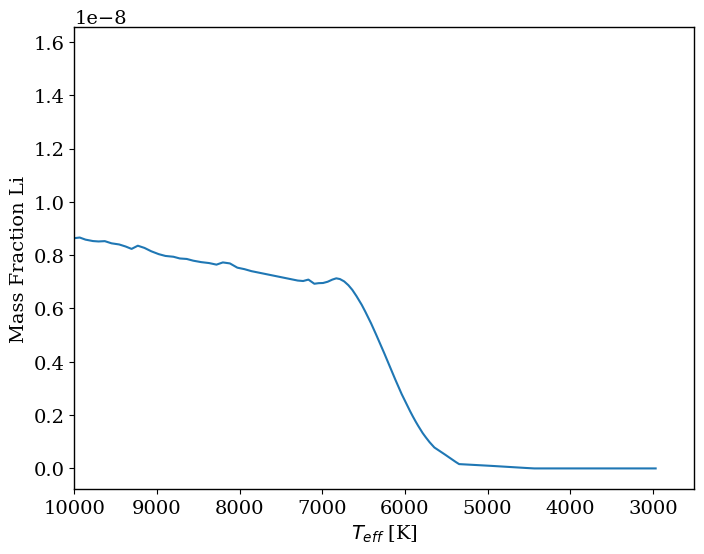

In [178]:
plt.rcParams.update({'font.size': 14})  # Set the font size


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('Mass Fraction Li')
ax.set_xlabel('$T_{eff}$ [K]')

ax.plot(10**MIST_FULL[0.1259]['log_Teff'], MIST_FULL[0.1259]['surface_li7'])

ax.set_xlim(2500, 10000)

ax.invert_xaxis()

In [179]:
max(10**MIST_FULL[0.1259]['log_Teff'])

339646.6795258933

In [180]:
min(10**MIST_FULL[0.1259]['log_Teff'])

2967.2765754069314

### SPOTS

In [166]:
file_path = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/018-Data/biosc_data/SPOTS_iso/f000.isoc'

data_lines = []

with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith('##') and line.strip():
            data = line.strip().split()
            data = [float(value) if value != '-99.0000' else None for value in data]
            data_lines.append(data)

SPOTS_f000 = pd.DataFrame(data_lines, columns=['log10_Age(yr)', 'Mass', 'Fspot', 'Xspot', 'log(L/Lsun)', 'log(R/Rsun)', 'log(g)', 'log(Teff)', 'log(T_hot)', 'log(T_cool)', 'TauCZ', 'Li/Li0', 'B_mag', 'V_mag', 'Rc_mag', 'Ic_mag', 'J_mag', 'H_mag', 'K_mag', 'W1_mag', 'G_mag', 'BP_mag', 'RP_mag'])

SPOTS_f000['Age [Gyr]'] = (10**(SPOTS_f000['log10_Age(yr)']))/(1e9)
SPOTS_f000

log10_Age(yr)  Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0               6.0  0.10    0.0    0.8    -1.264294    -0.062834  3.563422   
1               6.0  0.15    0.0    0.8    -1.016889     0.028539  3.556766   
2               6.0  0.20    0.0    0.8    -0.848551     0.084768  3.569247   
3               6.0  0.25    0.0    0.8    -0.706698     0.129191  3.577312   
4               6.0  0.30    0.0    0.8    -0.569443     0.172660  3.569533   
...             ...   ...    ...    ...          ...          ...       ...   
1820            9.6  1.10    0.0    0.8     0.229798     0.073119  4.332886   
1821            9.6  1.15    0.0    0.8     0.349532     0.117734  4.262962   
1822            9.6  1.20    0.0    0.8     0.470700     0.168494  4.179925   
1823            9.6  1.25    0.0    0.8     0.610740     0.234178  4.066284   
1824            9.6  1.30    0.0    0.8     0.756044     0.329867  3.891941   

      log(Teff)  log(T_hot)  log(T_cool)  ...  Rc_mag  Ic_mag   J_mag   H_mag  \
0      3.476971    3.476971          0.0  ...  9.9243  7.9855  6.0990  5.5140   
1      3.493135    3.493135          0.0  ...  8.9105  7.1942  5.5108  4.9443   
2      3.507105    3.507105          0.0  ...  8.1571  6.5901  5.0345  4.4736   
3      3.520357    3.520357          0.0  ...  7.5537  6.1067  4.6605  4.0931   
4      3.532936    3.532936          0.0  ...  7.0317  5.6894  4.3336  3.7546   
...         ...         ...          ...  ...     ...     ...     ...     ...   
1820   3.782517    3.782517          0.0  ...  3.9162  3.6071  3.1867  2.9486   
1821   3.790144    3.790144          0.0  ...  3.6266  3.3293  2.9258  2.7026   
1822   3.795055    3.795055          0.0  ...  3.3292  3.0399  2.6475  2.4340   
1823   3.797223    3.797223          0.0  ...  2.9815  2.6960  2.3087  2.0997   
1824   3.785705    3.785705          0.0  ...  2.6049  2.3008  1.8875  1.6557   

       K_mag  W1_mag   G_mag  BP_mag  RP_mag  Age [Gyr]  
0     5.1912     NaN     NaN     NaN     NaN   0.001000  
1     4.6464     NaN  8.2694  9.9514  6.8990   0.001000  
2     4.1947  4.0242  7.5512  9.1535  6.3059   0.001000  
3     3.8291  3.6985  6.9707  8.4631  5.8108   0.001000  
4     3.5025  3.3810  6.5194  7.9022  5.4176   0.001000  
...      ...     ...     ...     ...     ...        ...  
1820  2.8854  2.8584  4.1099  4.3861  3.6582   3.981072  
1821  2.6416  2.6145  3.8136  4.0753  3.3762   3.981072  
1822  2.3744  2.3472  3.5076  3.7605  3.0812   3.981072  
1823  2.0407  2.0134  3.1542  3.4031  2.7331   3.981072  
1824  1.5934  1.5664  2.7959  3.0658  2.3499   3.981072  

[1825 rows x 24 columns]

In [167]:
directory = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/018-Data/biosc_data/SPOTS_iso/'


# Dictionary to store dataframes for each file
SPOTS = {}

# Loop through each .isoc file
for filename in os.listdir(directory):
    if filename.endswith(".isoc"):
        file_path = os.path.join(directory, filename)
        # Extract the key from the filename (e.g., "f000")
        key = filename.split(".")[0]
        # Create a dictionary to store dataframes for each age
        age_dataframes = {}
        # Read the data from the file and create dataframes for each age
        with open(file_path, 'r') as file:
            data_lines = []
            for line in file:
                # Skip comment lines and blank lines
                if not line.startswith("##") and line.strip():
                    data = line.strip().split()
                    # If it's a data line
                    if len(data) > 1:
                        data = [float(value) if value != '-99.0000' else None for value in data]
                        data_lines.append(data)
            # Create a single dataframe for all ages
            df = pd.DataFrame(data_lines, columns=["log10_Age(yr)", "Mass", "Fspot", "Xspot", "log(L/Lsun)", "log(R/Rsun)", "log(g)", "log(Teff)", "log(T_hot)", "log(T_cool)", "TauCZ", "Li/Li0", "B_mag", "V_mag", "Rc_mag", "Ic_mag", "J_mag", "H_mag", "K_mag", "W1_mag", "G_mag", "BP_mag", "RP_mag"])
            # Calculate the age in Gyr and round to the third decimal
            df['Age [Gyr]'] = round((10**(df['log10_Age(yr)'])) / (1e9), 3)
            df['A(Li)'] = np.log10(df['Li/Li0']) + 3.3
            # Drop the original 'log10_Age(yr)' column
            df.drop(columns=['log10_Age(yr)'], inplace=True)
            # Group dataframe rows by 'Age [Gyr]' column
            grouped = df.groupby('Age [Gyr]')
            # Store each group (age) as a dataframe in the dictionary
            for age, group in grouped:
                age_dataframes[age] = group.reset_index(drop=True)
        # Store the dictionary of dataframes for each file
        SPOTS[key] = age_dataframes

# Print the dictionary of dictionaries
#print(SPOTS)

/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/biosc_env/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/biosc_env/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/biosc_env/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/biosc_env/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWa

In [53]:
SPOTS.keys()

dict_keys(['f017', 'f085', 'f051', 'f034', 'f068', 'f000'])

In [54]:
SPOTS['f000'].keys()

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.013, 0.014, 0.016, 0.018, 0.02, 0.022, 0.025, 0.028, 0.032, 0.035, 0.04, 0.045, 0.05, 0.056, 0.063, 0.071, 0.079, 0.089, 0.1, 0.112, 0.126, 0.141, 0.158, 0.178, 0.2, 0.224, 0.251, 0.282, 0.316, 0.355, 0.398, 0.447, 0.501, 0.562, 0.631, 0.708, 0.794, 0.891, 1.0, 1.122, 1.259, 1.413, 1.585, 1.778, 1.995, 2.239, 2.512, 2.818, 3.162, 3.548, 3.981])

In [55]:
SPOTS['f000'][0.126].columns

Index(['Mass', 'Fspot', 'Xspot', 'log(L/Lsun)', 'log(R/Rsun)', 'log(g)',
       'log(Teff)', 'log(T_hot)', 'log(T_cool)', 'TauCZ', 'Li/Li0', 'B_mag',
       'V_mag', 'Rc_mag', 'Ic_mag', 'J_mag', 'H_mag', 'K_mag', 'W1_mag',
       'G_mag', 'BP_mag', 'RP_mag', 'Age [Gyr]', 'A(Li)'],
      dtype='object')

In [56]:
SPOTS['f000'][0.126]

Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  log(Teff)  \
0   0.10    0.0    0.8    -2.689492    -0.761060  4.959872   3.469784   
1   0.15    0.0    0.8    -2.395952    -0.669096  4.952036   3.497187   
2   0.20    0.0    0.8    -2.201137    -0.599432  4.937648   3.511059   
3   0.25    0.0    0.8    -2.050513    -0.543744  4.923181   3.520871   
4   0.30    0.0    0.8    -1.925703    -0.496960  4.908773   3.528682   
5   0.35    0.0    0.8    -1.810935    -0.454479  4.890757   3.536133   
6   0.40    0.0    0.8    -1.690418    -0.414652  4.869095   3.546349   
7   0.45    0.0    0.8    -1.560148    -0.373196  4.837337   3.558189   
8   0.50    0.0    0.8    -1.414063    -0.329963  4.796627   3.573093   
9   0.55    0.0    0.8    -1.268473    -0.291167  4.760429   3.590093   
10  0.60    0.0    0.8    -1.152988    -0.260413  4.736709   3.603587   
11  0.65    0.0    0.8    -1.012628    -0.226149  4.702943   3.621545   
12  0.70    0.0    0.8    -0.864977    -0.195221  4.673272   3.642994   
13  0.75    0.0    0.8    -0.728511    -0.169368  4.651529   3.664184   
14  0.80    0.0    0.8    -0.597804    -0.145327  4.631475   3.684840   
15  0.85    0.0    0.8    -0.474711    -0.121780  4.610710   3.703839   
16  0.90    0.0    0.8    -0.358181    -0.098047  4.588069   3.721106   
17  0.95    0.0    0.8    -0.246858    -0.073722  4.562899   3.736774   
18  1.00    0.0    0.8    -0.140140    -0.048660  4.535051   3.750922   
19  1.05    0.0    0.8    -0.037916    -0.022712  4.504345   3.763504   
20  1.10    0.0    0.8     0.060162     0.003835  4.471454   3.774750   
21  1.15    0.0    0.8     0.154305     0.029990  4.438448   3.785208   
22  1.20    0.0    0.8     0.244443     0.055355  4.406203   3.795061   
23  1.25    0.0    0.8     0.330458     0.079603  4.375435   3.804440   
24  1.30    0.0    0.8     0.412322     0.101930  4.347814   3.813743   

    log(T_hot)  log(T_cool)         TauCZ  ...   Ic_mag   J_mag   H_mag  \
0     3.469784          0.0  1.426801e+07  ...  11.6001  9.6155  9.0239   
1     3.497187          0.0  1.446129e+07  ...  10.5881  8.9427  8.3794   
2     3.511059          0.0  1.549132e+07  ...   9.9265  8.4051  7.8433   
3     3.520871          0.0  1.813443e+07  ...   9.4625  8.0202  7.4523   
4     3.528682          0.0  1.015107e+07  ...   9.1011  7.7159  7.1412   
5     3.536133          0.0  6.845699e+06  ...   8.7796  7.4451  6.8629   
6     3.546349          0.0  5.319567e+06  ...   8.4472  7.1767  6.5836   
7     3.558189          0.0  4.234285e+06  ...   8.1051  6.8958  6.2914   
8     3.573093          0.0  3.367142e+06  ...   7.7016  6.5522  5.9365   
9     3.590093          0.0  2.764997e+06  ...   7.3113  6.2200  5.5957   
10    3.603587          0.0  2.495576e+06  ...   7.0343  5.9849  5.3636   
11    3.621545          0.0  2.238085e+06  ...   6.6822  5.6838  5.0749   
12    3.642994          0.0  1.983755e+06  ...   6.2992  5.3764  4.8015   
13    3.664184          0.0  1.785639e+06  ...   5.9306  5.0673  4.5298   
14    3.684840          0.0  1.608975e+06  ...   5.6029  4.8227  4.3370   
15    3.703839          0.0  1.445118e+06  ...   5.3011  4.6086  4.1778   
16    3.721106          0.0  1.290026e+06  ...   5.0055  4.3827  3.9951   
17    3.736774          0.0  1.138993e+06  ...   4.7447  4.1820  3.8359   
18    3.750922          0.0  9.871115e+05  ...   4.4900  3.9730  3.6584   
19    3.763504          0.0  8.302271e+05  ...   4.2403  3.7656  3.4810   
20    3.774750          0.0  6.615585e+05  ...   4.0100  3.5707  3.3156   
21    3.785208          0.0  4.856595e+05  ...   3.8037  3.3893  3.1565   
22    3.795061          0.0  3.239332e+05  ...   3.6056  3.2132  2.9997   
23    3.804440          0.0  1.982891e+05  ...   3.4192  3.0492  2.8554   
24    3.813743          0.0  1.124990e+05  ...   3.2447  2.8969  2.7223   

     K_mag  W1_mag    G_mag   BP_mag   RP_mag  Age [Gyr]     A(Li)  
0   8.6912     NaN      NaN      NaN      NaN      0.126      -inf  
1   8.0872     N

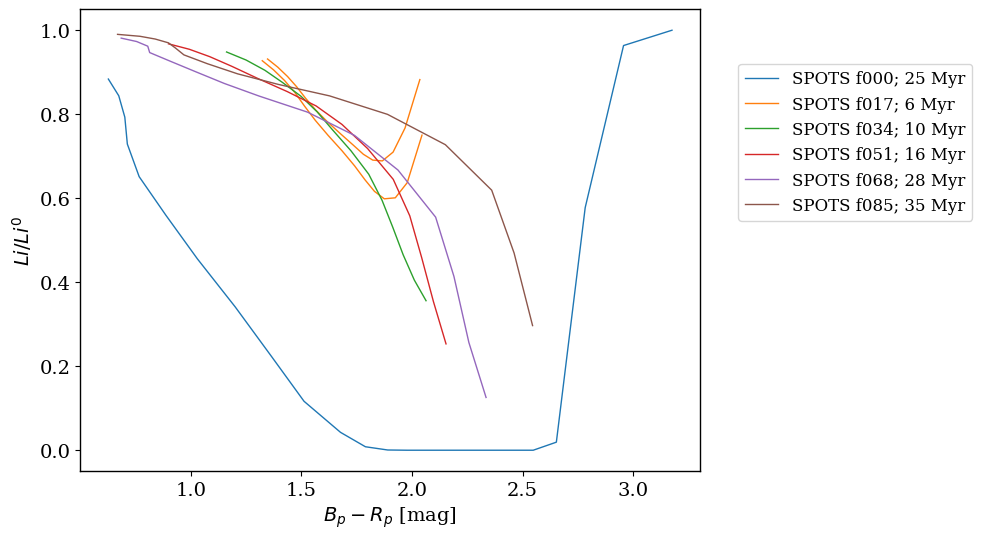

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$Li/Li^0$')
ax.set_xlabel('$B_p-R_p$ [mag]')
ax.plot(SPOTS['f000'][0.025]['BP_mag']-SPOTS['f000'][0.025]['RP_mag'], SPOTS['f000'][0.025]['Li/Li0'], linewidth=1, label='SPOTS f000; 25 Myr')
ax.plot(SPOTS['f017'][0.006]['BP_mag']-SPOTS['f017'][0.006]['RP_mag'], SPOTS['f017'][0.006]['Li/Li0'], linewidth=1, label='SPOTS f017; 6 Myr')
ax.plot(SPOTS['f034'][0.010]['BP_mag']-SPOTS['f034'][0.010]['RP_mag'], SPOTS['f034'][0.010]['Li/Li0'], linewidth=1, label='SPOTS f034; 10 Myr')
ax.plot(SPOTS['f051'][0.016]['BP_mag']-SPOTS['f051'][0.016]['RP_mag'], SPOTS['f051'][0.016]['Li/Li0'], linewidth=1, label='SPOTS f051; 16 Myr')
ax.plot(SPOTS['f068'][0.028]['BP_mag']-SPOTS['f068'][0.028]['RP_mag'], SPOTS['f068'][0.028]['Li/Li0'], linewidth=1, label='SPOTS f068; 28 Myr')
ax.plot(SPOTS['f085'][0.035]['BP_mag']-SPOTS['f085'][0.035]['RP_mag'], SPOTS['f085'][0.035]['Li/Li0'], linewidth=1, label='SPOTS f085; 35 Myr')



#ax.errorbar(data_obs_Pleiades['Teff'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))

In [58]:
SPOTS['f000'].keys()

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.013, 0.014, 0.016, 0.018, 0.02, 0.022, 0.025, 0.028, 0.032, 0.035, 0.04, 0.045, 0.05, 0.056, 0.063, 0.071, 0.079, 0.089, 0.1, 0.112, 0.126, 0.141, 0.158, 0.178, 0.2, 0.224, 0.251, 0.282, 0.316, 0.355, 0.398, 0.447, 0.501, 0.562, 0.631, 0.708, 0.794, 0.891, 1.0, 1.122, 1.259, 1.413, 1.585, 1.778, 1.995, 2.239, 2.512, 2.818, 3.162, 3.548, 3.981])

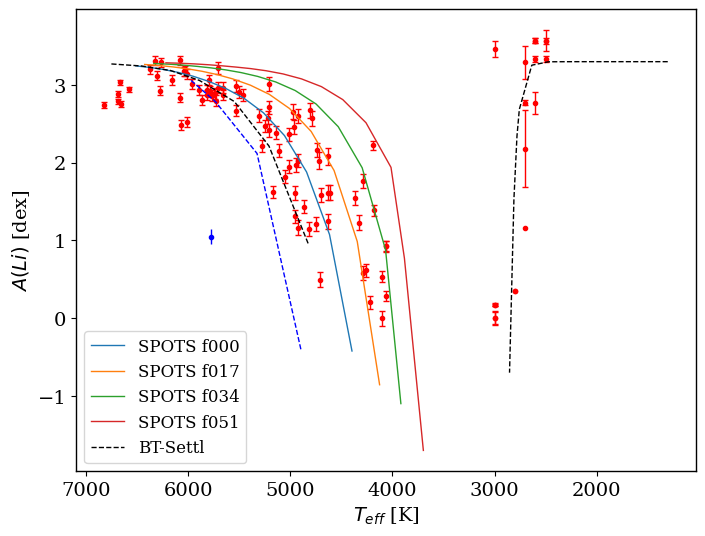

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('$T_{eff}$ [K]')
ax.plot(10**SPOTS['f000'][0.126]['log(Teff)'], SPOTS['f000'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(10**SPOTS['f017'][0.126]['log(Teff)'], SPOTS['f017'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(10**SPOTS['f034'][0.126]['log(Teff)'], SPOTS['f034'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')
ax.plot(10**SPOTS['f051'][0.126]['log(Teff)'], SPOTS['f051'][0.126]['A(Li)'], linewidth=1, label='SPOTS f051')

ax.errorbar(Tsun, solar_abundance, xerr=0.5, yerr=e_solar_abundance, fmt='.', zorder=2, color='b', elinewidth=1, capsize=0)

ax.plot(BTSettl_Li_isochrones[5]['Teff'], BTSettl_Li_isochrones[5]['A(Li)'], linewidth=1, linestyle='--', color='b')

ax.plot(BTSettl_Li_isochrones[0.120]['Teff'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
ax.errorbar(data_obs_Pleiades['Teff'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12)
ax.invert_xaxis()

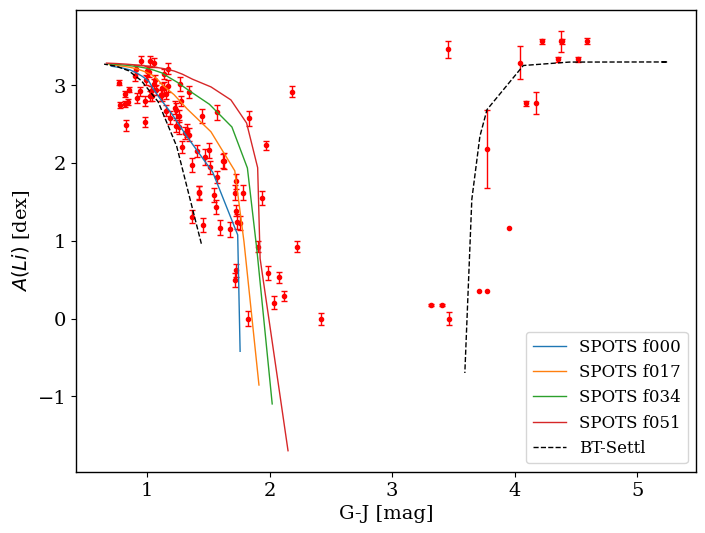

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-J [mag]')
ax.plot(SPOTS['f000'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f000'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(SPOTS['f017'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f017'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(SPOTS['f034'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f034'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')
ax.plot(SPOTS['f051'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f051'][0.126]['A(Li)'], linewidth=1, label='SPOTS f051')



ax.plot(BTSettl_Li_isochrones[0.120]['G']-BTSettl_Li_isochrones[0.120]['J'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
ax.errorbar(data_obs_Pleiades['g']-data_obs_Pleiades['Jmag'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12)

In [61]:
data_obs_Pleiades[(~data_obs_Pleiades['ALi'].isnull()) & (data_obs_Pleiades['ALi'] != 0)]['ALi'].count()

99

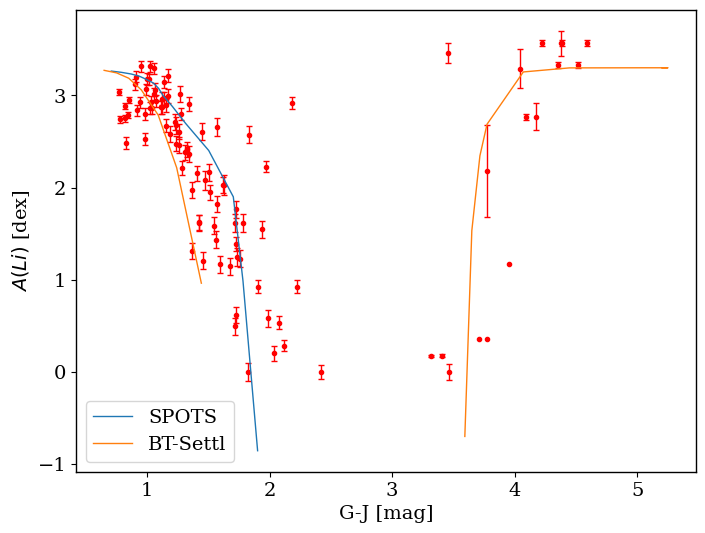

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-J [mag]')
ax.plot(SPOTS['f017'][0.126]['G_mag']-SPOTS['f017'][0.126]['J_mag'], SPOTS['f017'][0.126]['A(Li)'], linewidth=1, label='SPOTS')
ax.plot(BTSettl_Li_isochrones[0.120]['G']-BTSettl_Li_isochrones[0.120]['J'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl')
ax.errorbar(data_obs_Pleiades['g']-data_obs_Pleiades['Jmag'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend()


In [63]:
max(10**SPOTS['f000'][0.126]['log(Teff)'])

6512.426277507005

In [64]:
min(10**SPOTS['f000'][0.126]['log(Teff)'])

2949.742462182295

### BHAC15

In [65]:
def parse_file(file_path):
    data = {}
    current_key = None
    current_data = []
    columns_line = None
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            
            if line.startswith('!  t (Gyr) ='):
                if current_key is not None:
                    columns = ['M/Ms', 'Teff', 'L/Ls', 'g', 'R/Rs', 'Li/Li0', 'F33', 'F33B', 'F41', 'F45B', 'F47', 
                               'F51', 'FHa', 'F57', 'F63B', 'F67', 'F75', 'F78', 'F82', 'F82B', 'F89', 'G_RSV', 'G', 
                               'G_BP', 'G_RP']
                    df = pd.DataFrame(current_data, columns=columns)
                    df = df.dropna()
                    # Agregar la columna "age(Gyr)" con el valor de la clave actual
                    df['age(Gyr)'] = float(current_key)
                    data[current_key] = df
                    
                current_key = line.split('=')[1].strip()
                current_data = []
            elif line.startswith('!'):
                if columns_line is None:
                    columns_line = line
            else:
                current_data.append(line.split())
                
    if current_key is not None:
        columns = ['M/Ms', 'Teff', 'L/Ls', 'g', 'R/Rs', 'Li/Li0', 'F33', 'F33B', 'F41', 'F45B', 'F47', 
                   'F51', 'FHa', 'F57', 'F63B', 'F67', 'F75', 'F78', 'F82', 'F82B', 'F89', 'G_RSV', 'G', 
                   'G_BP', 'G_RP']
        df = pd.DataFrame(current_data, columns=columns)
        df = df.dropna()
        # Agregar la columna "age(Gyr)" con el valor de la clave actual
        df['age(Gyr)'] = float(current_key)
        data[current_key] = df
        
    return data

# Ejemplo de uso
file_path = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/BHAC15_iso.GAIA.txt'
BHAC15_dict = parse_file(file_path)

In [66]:
#BHAC15_dict

In [67]:
def save_to_csv(data_dict, file_path):
    combined_df = pd.concat(data_dict.values(), ignore_index=True)
    
    csv_file_path = file_path.replace('.txt', '.csv')
    combined_df.to_csv(csv_file_path, header=False, index=False)
    
    with open(csv_file_path, 'r') as f:
        lines = f.readlines()
    lines.insert(0, ','.join(combined_df.columns) + '\n')
    with open(csv_file_path, 'w') as f:
        f.writelines(lines)


save_to_csv(BHAC15_dict, file_path)

csv_file_path = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/BHAC15_iso.GAIA.csv'

df = pd.read_csv(csv_file_path)

df = df.set_index(df.index - 1)

# Renombrar las columnas
column_names = ['M/Ms', 'Teff', 'L/Ls', 'g', 'R/Rs', 'Li/Li0', 'F33', 'F33B', 'F41', 'F45B', 
                'F47', 'F51', 'FHa', 'F57', 'F63B', 'F67', 'F75', 'F78', 'F82', 'F82B', 
                'F89', 'G_RSV', 'G', 'G_BP', 'G_RP', 'age(Gyr)']
df.columns = column_names

df.index = df.index + 1

df.to_csv('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/BHAC15_iso.GAIA.csv')

### Isochrones plots

Isochrones in HRD (interior) and CMD (atmosphere)

[[ 0.5212843   2.04256859]
 [ 2.61163962  6.22327925]
 [ 6.80778139 14.61556277]
 [ 8.88891805 18.77783609]]


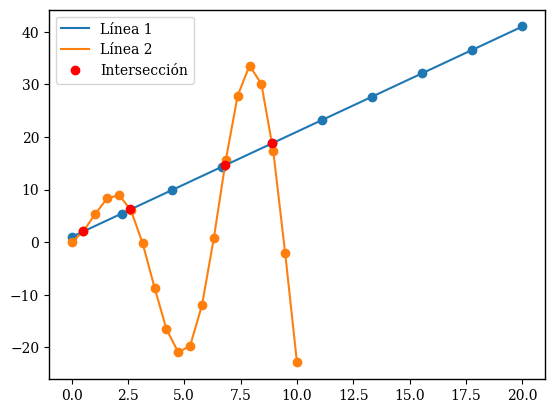

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.lines import Line2D

plt.rcParams.update({'font.size': 10})  # Set the font size

def find_intersection(line1, line2):
    intersection_points = []
    for i in range(len(line1) - 1):
        for j in range(len(line2) - 1):
            path1 = Path([line1[i], line1[i+1]])
            path2 = Path([line2[j], line2[j+1]])
            if path1.intersects_path(path2):
                x_int, y_int = get_intersection(line1[i], line1[i+1], line2[j], line2[j+1])
                intersection_points.append((x_int, y_int))
    return intersection_points

def get_intersection(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return None, None
    x_int = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    y_int = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom
    return x_int, y_int

x1 = np.linspace(0, 20, 10)
y1 = 2 * x1 + 1

x2 = np.linspace(0, 10, 20)
y2 = (4 * x2 + 2)*np.sin(x2)

intersection_points = find_intersection(np.column_stack((x1, y1)), np.column_stack((x2, y2)))

plt.plot(x1, y1, label='Línea 1')
plt.plot(x2, y2, label='Línea 2')
plt.scatter(x1, y1)
plt.scatter(x2, y2)

if intersection_points:
    intersection_points = np.array(intersection_points)
    plt.plot(intersection_points[:, 0], intersection_points[:, 1], 'ro', label='Intersección')

print(intersection_points)
    

plt.legend()
plt.show()

In [168]:
bands1 = [['G', 'RP'], ['G', 'J'], ['J', 'K'], ['G', 'y'], ['G', 'z']]
bands2 = [['G_i00', 'G_RP_i00'], ['G_i00', 'J_i00'], ['J_i00', 'Ks_i00'], ['G_i00', 'yP1_i00'], ['G_i00', 'zP1_i00']]
bandsobs = [['g', 'rp'], ['g', 'Jmag'], ['Jmag', 'Kmag'], ['g', 'ymag'], ['g', 'zmag']]


# Function to get the first word of a string
def get_first_word(string):
    return string.split()[0]

# Function to save the model comparison
def save_model_comparison(filename, mod1, mod2, dpi=400):
    mod1_first_word = get_first_word(mod1)
    mod2_first_word = get_first_word(mod2)
    final_filename = f"{filename}_{mod1_first_word}_{mod2_first_word}.png"
    plt.savefig(final_filename, dpi=dpi, bbox_inches='tight')

# Function to find intersection between two lines
def find_intersection(line1, line2):
    intersection_points = []
    for i in range(len(line1) - 1):
        for j in range(len(line2) - 1):
            path1 = Path([line1[i], line1[i+1]])
            path2 = Path([line2[j], line2[j+1]])
            if path1.intersects_path(path2):
                x_int, y_int = get_intersection(line1[i], line1[i+1], line2[j], line2[j+1])
                intersection_points.append((x_int, y_int))
    return intersection_points

# Function to find the intersection point between two line segments
def get_intersection(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return None, None
    x_int = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    y_int = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom
    return x_int, y_int    

# Definition of bands
bands1 = [['G', 'RP'], ['G', 'J'], ['J', 'K'], ['G', 'y'], ['G', 'z']]
bands2 = [['G_i00', 'G_RP_i00'], ['G_i00', 'J_i00'], ['J_i00', 'Ks_i00'], ['G_i00', 'yP1_i00'], ['G_i00', 'zP1_i00']]
bandsobs = [['g', 'rp'], ['g', 'Jmag'], ['Jmag', 'Kmag'], ['g', 'ymag'], ['g', 'zmag']]

# Main function to plot the isochrones grid
def plot_isochrones_grid(model1_dict, model2_dict, bands1, bands2, mod1, mod2, filename=None, dpi=350, data_obs=None, obs=False):
    plt.rcParams.update({'font.size': 26})  # Set the font size

    fig, axs = plt.subplots(4, 5, figsize=(55, 28), sharex='col')  # Create the figure and subplots
    isochrones = [0.02, 0.08, 0.12, 0.6]  # List of isochrones to use
    max_mass_labels = 5  # Maximum number of mass labels to show
    
    legend_labels = {f'{get_first_word(mod1)}': f'{get_first_word(mod1)}',
                     f'{get_first_word(mod2)}': f'{get_first_word(mod2)}',
                     'Obs': 'Obs'}
    
    # Iterate over each column (band combination)
    for i, (band1, band2) in enumerate(zip(bands1, bands2)):
        max_x_column = float('-inf')
        max_y = float('-inf')

        # Iterate over each row (isochrone)
        for j, isochrone in enumerate(isochrones):
            ax = axs[j, i]
            isochrone_1 = min(model1_dict.keys(), key=lambda x: abs(x - isochrone))
            isochrone_2 = min(model2_dict.keys(), key=lambda x: abs(x - isochrone))

            model1_df = model1_dict[isochrone_1]
            model1_df = model1_df.loc[model1_df['M/Ms'] < 1.5]
            model1_df = model1_df.loc[model1_df['M/Ms'] > 0.08]
            
            model2_df = model2_dict[isochrone_2]
            model2_df = model2_df.loc[model2_df['M/Ms'] < 1.5]
            model2_df = model2_df.loc[model2_df['M/Ms'] > 0.08]
            
            min_mm_model1 = min(model1_df['M/Ms'])
            min_mm_model2 = min(model2_df['M/Ms'])

            mm_values = np.linspace(1.5, min(min_mm_model1, min_mm_model2), 5)

            x1 = model1_dict[isochrone_1][band1[0]] - model1_dict[isochrone_1][band1[1]]
            y1 = model1_dict[isochrone_1][band1[0]]
            x2 = model2_dict[isochrone_2][band2[0]] - model2_dict[isochrone_2][band2[1]]
            y2 = model2_dict[isochrone_2][band2[0]]

            ax.plot(x1, y1, label=f'{get_first_word(mod1)}', zorder=2, linewidth=2, color='blue')
            ax.plot(x2, y2, label=f'{get_first_word(mod2)}', zorder=1, linewidth=2, color='orange')

            max_x_column = max(max_x_column, np.max(x1), np.max(x2))
            max_y = max(max_y, np.max(y1), np.max(y2))
            
            for mm_value in mm_values:
                closest_row_model1 = model1_df.iloc[(model1_df['M/Ms'] - mm_value).abs().argsort()[:1]]
                closest_row_model2 = model2_df.iloc[(model2_df['M/Ms'] - mm_value).abs().argsort()[:1]]

                x_mass_model1 = closest_row_model1[band1[0]] - closest_row_model1[band1[1]]
                y_mass_model1 = closest_row_model1[band1[0]]
                mass_model1 = closest_row_model1['M/Ms']

                x_mass_model2 = closest_row_model2[band2[0]] - closest_row_model2[band2[1]]
                y_mass_model2 = closest_row_model2[band2[0]]
                mass_model2 = closest_row_model2['M/Ms']

                for x_mass1, y_mass1, mass1, x_mass2, y_mass2, mass2 in zip(x_mass_model1, y_mass_model1, mass_model1, x_mass_model2, y_mass_model2, mass_model2):
                    text = f'{((mass1+mass2)/2):.3f}'
                    text_length = len(text) * 0.15  # Estimar la longitud del texto (suponiendo 0.15 como el ancho aproximado por carácter)
                    text_height = 0.03  # Estimar la altura del texto (suponiendo 0.03)

                    if x_mass2 - x_mass1 < 0:
                        text_x = x_mass1 + (1/30)*(max_x_column+0.2)
                        ax.text(text_x, y_mass1, text, fontsize=12, color='k')
                    elif x_mass1 - x_mass2 < 0:
                        text_x = x_mass2 + (1/30)*(max_x_column+0.2)
                        ax.text(text_x, y_mass2, text, fontsize=12, color='k')

                    ax.plot([x_mass1, x_mass2], [y_mass1, y_mass2], color='k', linewidth=1)

            intersection_points = find_intersection(np.column_stack((x1, y1)), np.column_stack((x2, y2)))

            if intersection_points:
                first_point = intersection_points[0]
                if -0.2 <= first_point[0] <= max_x_column and 1 <= first_point[1] <= max_y:
                    ax.plot([-0.2, first_point[0]], [first_point[1], first_point[1]], color='black', linewidth=1, linestyle='--')
                    ax.plot([first_point[0], first_point[0]], [max_y, first_point[1]], color='black', linewidth=1, linestyle='--')
                    ax.text(0.55, 0.95, f'({first_point[0]:.2f}, {first_point[1]:.2f})', fontsize=18, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='black')  # Adjusted position for text
                else:
                    pass
            
            # Plot observational data if available
            if obs and (isochrone == 0.08 or isochrone == 0.12):  # Agregar esta condición para dibujar solo para isocronas de 0.080 y 0.120
                ax.errorbar(data_obs[f'{bandsobs[i][0]}'+'_abs']-data_obs[f'{bandsobs[i][1]}'+'_abs'],
                            data_obs[f'{bandsobs[i][0]}'+'_abs'], 
                            yerr=data_obs['e_'+f'{bandsobs[i][0]}'], fmt='.', alpha=0.125, label='Obs', zorder=0, color='r')

            if j == 3:
                ax.set_xlabel(f'{band1[0]}-{band1[1]} [mag]')
                ax.set_ylabel(f'{band1[0]} [mag]')
                ax.xaxis.set_major_locator(ticker.AutoLocator())
                ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
                ax.text(0.825, 0.85, f'{isochrone_1} Gyr', transform=ax.transAxes, fontsize=18, verticalalignment='bottom', horizontalalignment='left')  # Adjusted position for text

            else:
                ax.set_ylabel(f'{band1[0]} [mag]')
                ax.set_xticklabels([])
                ax.tick_params(axis='both', which='both', length=5)

                ax.text(0.825, 0.85, f'{round(isochrone_1, 3)} Gyr', transform=ax.transAxes, fontsize=18, verticalalignment='bottom', horizontalalignment='left')  # Adjusted position for text

            ax.set_xlim(-0.2, max_x_column+(1/8)*(max_x_column+0.2))
            ax.set_ylim(1, max_y)
            ax.invert_yaxis()

    plt.subplots_adjust(hspace=0, wspace=0.175)
    fig.suptitle(f'CMD; {mod1} vs {mod2}', y=0.94)
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(set(labels))
    legend_handles = [handles[labels.index(label)] for label in unique_labels]
    if obs:
        legend_handles.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Obs'))  # Add observation marker to the legend
    fig.legend(legend_handles, unique_labels + ['Obs'], loc='upper center', bbox_to_anchor=(0.5, 0.9225), fontsize=24, ncol=3, edgecolor='black')  # Añadir leyenda debajo del título
    if filename:
        save_model_comparison(filename, mod1, mod2, dpi=dpi)
    plt.show()
    
    plt.rcParams.update({'font.size': 14})  # Set the font size


# Main function to plot a single column of isochrones grid
def plot_single_column(model1_dict, model2_dict, band1, band2, bandobs, mod1, mod2, filename=None, dpi=350, data_obs=None, obs=False):
    plt.rcParams.update({'font.size': 14})  # Set the font size

    fig, axs = plt.subplots(4, 1, figsize=(10, 28), sharex='col')  # Create the figure and subplots
    isochrones = [0.02, 0.08, 0.12, 0.6]  # List of isochrones to use
    max_mass_labels = 5  # Maximum number of mass labels to show
    
    legend_labels = {f'{get_first_word(mod1)}': f'{get_first_word(mod1)}',
                     f'{get_first_word(mod2)}': f'{get_first_word(mod2)}',
                     'Obs': 'Obs'}
    
    # Iterate over each row (isochrone)
    for j, isochrone in enumerate(isochrones):
        ax = axs[j]
        isochrone_1 = min(model1_dict.keys(), key=lambda x: abs(x - isochrone))
        isochrone_2 = min(model2_dict.keys(), key=lambda x: abs(x - isochrone))

        model1_df = model1_dict[isochrone_1]
        model1_df = model1_df.loc[model1_df['M/Ms'] < 1.5]
        model1_df = model1_df.loc[model1_df['M/Ms'] > 0.08]
        
        model2_df = model2_dict[isochrone_2]
        model2_df = model2_df.loc[model2_df['M/Ms'] < 1.5]
        model2_df = model2_df.loc[model2_df['M/Ms'] > 0.08]
        
        min_mm_model1 = min(model1_df['M/Ms'])
        min_mm_model2 = min(model2_df['M/Ms'])

        mm_values = np.linspace(1.5, min(min_mm_model1, min_mm_model2), 5)

        x1 = model1_dict[isochrone_1][band1[0]] - model1_dict[isochrone_1][band1[1]]
        y1 = model1_dict[isochrone_1][band1[2]]
        x2 = model2_dict[isochrone_2][band2[0]] - model2_dict[isochrone_2][band2[1]]
        y2 = model2_dict[isochrone_2][band2[2]]

        ax.plot(x1, y1, label=f'{get_first_word(mod1)}', zorder=2, linewidth=2, color='blue')
        ax.plot(x2, y2, label=f'{get_first_word(mod2)}', zorder=1, linewidth=2, color='orange')

        max_x_column = max(np.max(x1), np.max(x2))
        max_y = max(np.max(y1), np.max(y2))
        
        for mm_value in mm_values:
            closest_row_model1 = model1_df.iloc[(model1_df['M/Ms'] - mm_value).abs().argsort()[:1]]
            closest_row_model2 = model2_df.iloc[(model2_df['M/Ms'] - mm_value).abs().argsort()[:1]]

            x_mass_model1 = closest_row_model1[band1[0]] - closest_row_model1[band1[1]]
            y_mass_model1 = closest_row_model1[band1[2]]
            mass_model1 = closest_row_model1['M/Ms']

            x_mass_model2 = closest_row_model2[band2[0]] - closest_row_model2[band2[1]]
            y_mass_model2 = closest_row_model2[band2[2]]
            mass_model2 = closest_row_model2['M/Ms']

            for x_mass1, y_mass1, mass1, x_mass2, y_mass2, mass2 in zip(x_mass_model1, y_mass_model1, mass_model1, x_mass_model2, y_mass_model2, mass_model2):
                text = f'{((mass1+mass2)/2):.3f}'
                text_length = len(text) * 0.15  # Estimar la longitud del texto (suponiendo 0.15 como el ancho aproximado por carácter)
                text_height = 0.03  # Estimar la altura del texto (suponiendo 0.03)

                if x_mass2 - x_mass1 < 0:
                    text_x = x_mass1 + (1/30)*(max_x_column+0.2)
                    ax.text(text_x, y_mass1, text, fontsize=12, color='k')
                elif x_mass1 - x_mass2 < 0:
                    text_x = x_mass2 + (1/30)*(max_x_column+0.2)
                    ax.text(text_x, y_mass2, text, fontsize=12, color='k')

                ax.plot([x_mass1, x_mass2], [y_mass1, y_mass2], color='k', linewidth=1)

        intersection_points = find_intersection(np.column_stack((x1, y1)), np.column_stack((x2, y2)))

        if intersection_points:
            first_point = intersection_points[0]
            if -0.2 <= first_point[0] <= max_x_column and 1 <= first_point[1] <= max_y:
                ax.plot([-0.2, first_point[0]], [first_point[1], first_point[1]], color='black', linewidth=1, linestyle='--')
                ax.plot([first_point[0], first_point[0]], [max_y, first_point[1]], color='black', linewidth=1, linestyle='--')
                ax.text(0.55, 0.95, f'({first_point[0]:.2f}, {first_point[1]:.2f})', fontsize=18, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='black')  # Adjusted position for text
            else:
                pass

        # Plot observational data if available
        if obs and (isochrone == 0.08 or isochrone == 0.12):  # Agregar esta condición para dibujar solo para isocronas de 0.080 y 0.120
            ax.errorbar(data_obs[f'{bandobs[0]}'+'_abs']-data_obs[f'{bandobs[1]}'+'_abs'],
                        data_obs[f'{bandobs[2]}'+'_abs'], 
                        yerr=data_obs['e_'+f'{bandobs[2]}'], fmt='.', alpha=0.125, label='Obs', zorder=0, color='r')

        ax.set_xlabel(f'{band1[0]}-{band1[1]} [mag]')
        ax.set_ylabel(f'{band1[2]} [mag]')
        ax.xaxis.set_major_locator(ticker.AutoLocator())
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.text(0.825, 0.85, f'{round(isochrone_1, 3)} Gyr', transform=ax.transAxes, fontsize=18, verticalalignment='bottom', horizontalalignment='left')  # Adjusted position for text

        ax.set_xlim(-0.2, 6)
        ax.set_ylim(1, max_y)
        ax.invert_yaxis()

    plt.subplots_adjust(hspace=0)
    fig.suptitle(f'CMD; {mod1} vs {mod2}', y=0.9075)
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(set(labels))
    legend_handles = [handles[labels.index(label)] for label in unique_labels]
    if obs:
        legend_handles.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Obs'))  # Add observation marker to the legend
    fig.legend(legend_handles, unique_labels + ['Obs'], loc='upper center', bbox_to_anchor=(0.5, 0.9), fontsize=16, ncol=3, edgecolor='black')  # Añadir leyenda debajo del título
    if filename:
        save_model_comparison(filename, mod1, mod2, dpi=dpi)
    plt.show()

    plt.rcParams.update({'font.size': 14})  # Set the font size

def plot_single_column_Teff(model1_dict, model2_dict, mod1, mod2, filename=None, dpi=350, data_obs=None, obs=False):
    plt.rcParams.update({'font.size': 14})  # Set the font size

    fig, axs = plt.subplots(4, 1, figsize=(10, 28), sharex='col')  # Create the figure and subplots
    isochrones = [0.02, 0.08, 0.12, 0.6]  # List of isochrones to use
    max_mass_labels = 5  # Maximum number of mass labels to show
    
    legend_labels = {f'{get_first_word(mod1)}': f'{get_first_word(mod1)}',
                     f'{get_first_word(mod2)}': f'{get_first_word(mod2)}',
                     'Obs': 'Obs'}
    
    # Iterate over each row (isochrone)
    for j, isochrone in enumerate(isochrones):
        ax = axs[j]
        isochrone_1 = min(model1_dict.keys(), key=lambda x: abs(x - isochrone))
        isochrone_2 = min(model2_dict.keys(), key=lambda x: abs(x - isochrone))
        
        model1_df = model1_dict[isochrone_1]
        model1_df = model1_df.loc[model1_df['M/Ms'] < 1.5]
        model1_df = model1_df.loc[model1_df['M/Ms'] > 0.08]
        
        model2_df = model2_dict[isochrone_2]
        model2_df = model2_df.loc[model2_df['M/Ms'] < 1.5]
        model2_df = model2_df.loc[model2_df['M/Ms'] > 0.08]
        
        min_mm_model1 = min(model1_df['M/Ms'])
        min_mm_model2 = min(model2_df['M/Ms'])

        mm_values = np.linspace(1.5, min(min_mm_model1, min_mm_model2), 5)

        x1 = model1_dict[isochrone_1]['Teff']
        y1 = np.log10(model1_dict[isochrone_1]['Lsun'])
        x2 = model2_dict[isochrone_2]['Teff']
        y2 = np.log10(model2_dict[isochrone_2]['Lsun'])

        ax.plot(x1, y1, label=f'{get_first_word(mod1)}', zorder=2, linewidth=2, color='blue')
        ax.plot(x2, y2, label=f'{get_first_word(mod2)}', zorder=1, linewidth=2, color='orange')

        max_x_column = max(np.max(x1), np.max(x2))
        max_y = max(np.max(y1), np.max(y2))
        
        for mm_value in mm_values:
            closest_row_model1 = model1_df.iloc[(model1_df['M/Ms'] - mm_value).abs().argsort()[:1]]
            closest_row_model2 = model2_df.iloc[(model2_df['M/Ms'] - mm_value).abs().argsort()[:1]]

            x_mass_model1 = closest_row_model1['Teff']
            y_mass_model1 = np.log10(closest_row_model1['Lsun'])
            mass_model1 = closest_row_model1['M/Ms']

            x_mass_model2 = closest_row_model2['Teff']
            y_mass_model2 = np.log10(closest_row_model2['Lsun'])
            mass_model2 = closest_row_model2['M/Ms']

            for x_mass1, y_mass1, mass1, x_mass2, y_mass2, mass2 in zip(x_mass_model1, y_mass_model1, mass_model1, x_mass_model2, y_mass_model2, mass_model2):
                text = f'{((mass1+mass2)/2):.3f}'
                text_length = len(text) * 0.15  # Estimar la longitud del texto (suponiendo 0.15 como el ancho aproximado por carácter)
                text_height = 0.03  # Estimar la altura del texto (suponiendo 0.03)

                if y_mass2+10 - (y_mass1+10) < 0:
                    text_x = x_mass1 + (1/10)*(8000-1000)
                    ax.text(text_x, y_mass1-0.25, text, fontsize=12, color='k')
                elif y_mass2+10 - (y_mass1+10) > 0:
                    text_x = x_mass2 + 75
                    ax.text(text_x, y_mass2+0.25, text, fontsize=12, color='k')

                ax.plot([x_mass1, x_mass2], [y_mass1, y_mass2], color='k', linewidth=1)

        intersection_points = find_intersection(np.column_stack((x1, y1)), np.column_stack((x2, y2)))

        if intersection_points:
            first_point = intersection_points[0]
            if 1000 <= first_point[0] <= 8000 and -4.5 <= first_point[1] <= 1.2:
                ax.plot([first_point[0], 8200], [first_point[1], first_point[1]], color='black', linewidth=1, linestyle='--')
                ax.plot([first_point[0], first_point[0]], [-4.5, first_point[1]], color='black', linewidth=1, linestyle='--')
                ax.text(0.55, 0.95, f'({first_point[0]:.2f}, {first_point[1]:.2f})', fontsize=18, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='black')  # Adjusted position for text
            else:
                pass

        # Plot observational data if available
        if obs and (isochrone == 0.08 or isochrone == 0.12):  # Agregar esta condición para dibujar solo para isocronas de 0.080 y 0.120
            ax.scatter(data_obs['Teff_x'],
                        np.log10(data_obs['Lsun']),
                        alpha=0.125, label='Obs', s=10, zorder=0, color='r')

        ax.set_xlabel('$T_{eff}$ [K]')
        ax.set_ylabel('$\log{(\mathcal{L}/\mathcal{L}_{\odot})}$')
        ax.xaxis.set_major_locator(ticker.AutoLocator())
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.text(0.825, 0.85, f'{round(isochrone_1, 3)} Gyr', transform=ax.transAxes, fontsize=18, verticalalignment='bottom', horizontalalignment='left')  # Adjusted position for text

        ax.set_xlim(2000, 8200)
        ax.set_ylim(-3.75, 1.2)
        ax.invert_xaxis()

    plt.subplots_adjust(hspace=0)
    fig.suptitle(f'HRD; {mod1} vs {mod2}', y=0.9075)
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(set(labels))
    legend_handles = [handles[labels.index(label)] for label in unique_labels]
    if obs:
        legend_handles.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Obs'))  # Add observation marker to the legend
    fig.legend(legend_handles, unique_labels + ['Obs'], loc='upper center', bbox_to_anchor=(0.5, 0.9), fontsize=16, ncol=3, edgecolor='black')  # Añadir leyenda debajo del título
    if filename:
        save_model_comparison(filename, mod1, mod2, dpi=dpi)
    plt.show()

    plt.rcParams.update({'font.size': 14})  # Set the font size
    
# Example usage
#plot_isochrones_grid(BTSettl_Li_isochrones, PARSEC_iso_omega_00_Phot_dict, bands1, bands2, 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Z=0.001547$', filename='model_comparison', data_obs=data_obs_Pleiades, obs=True)

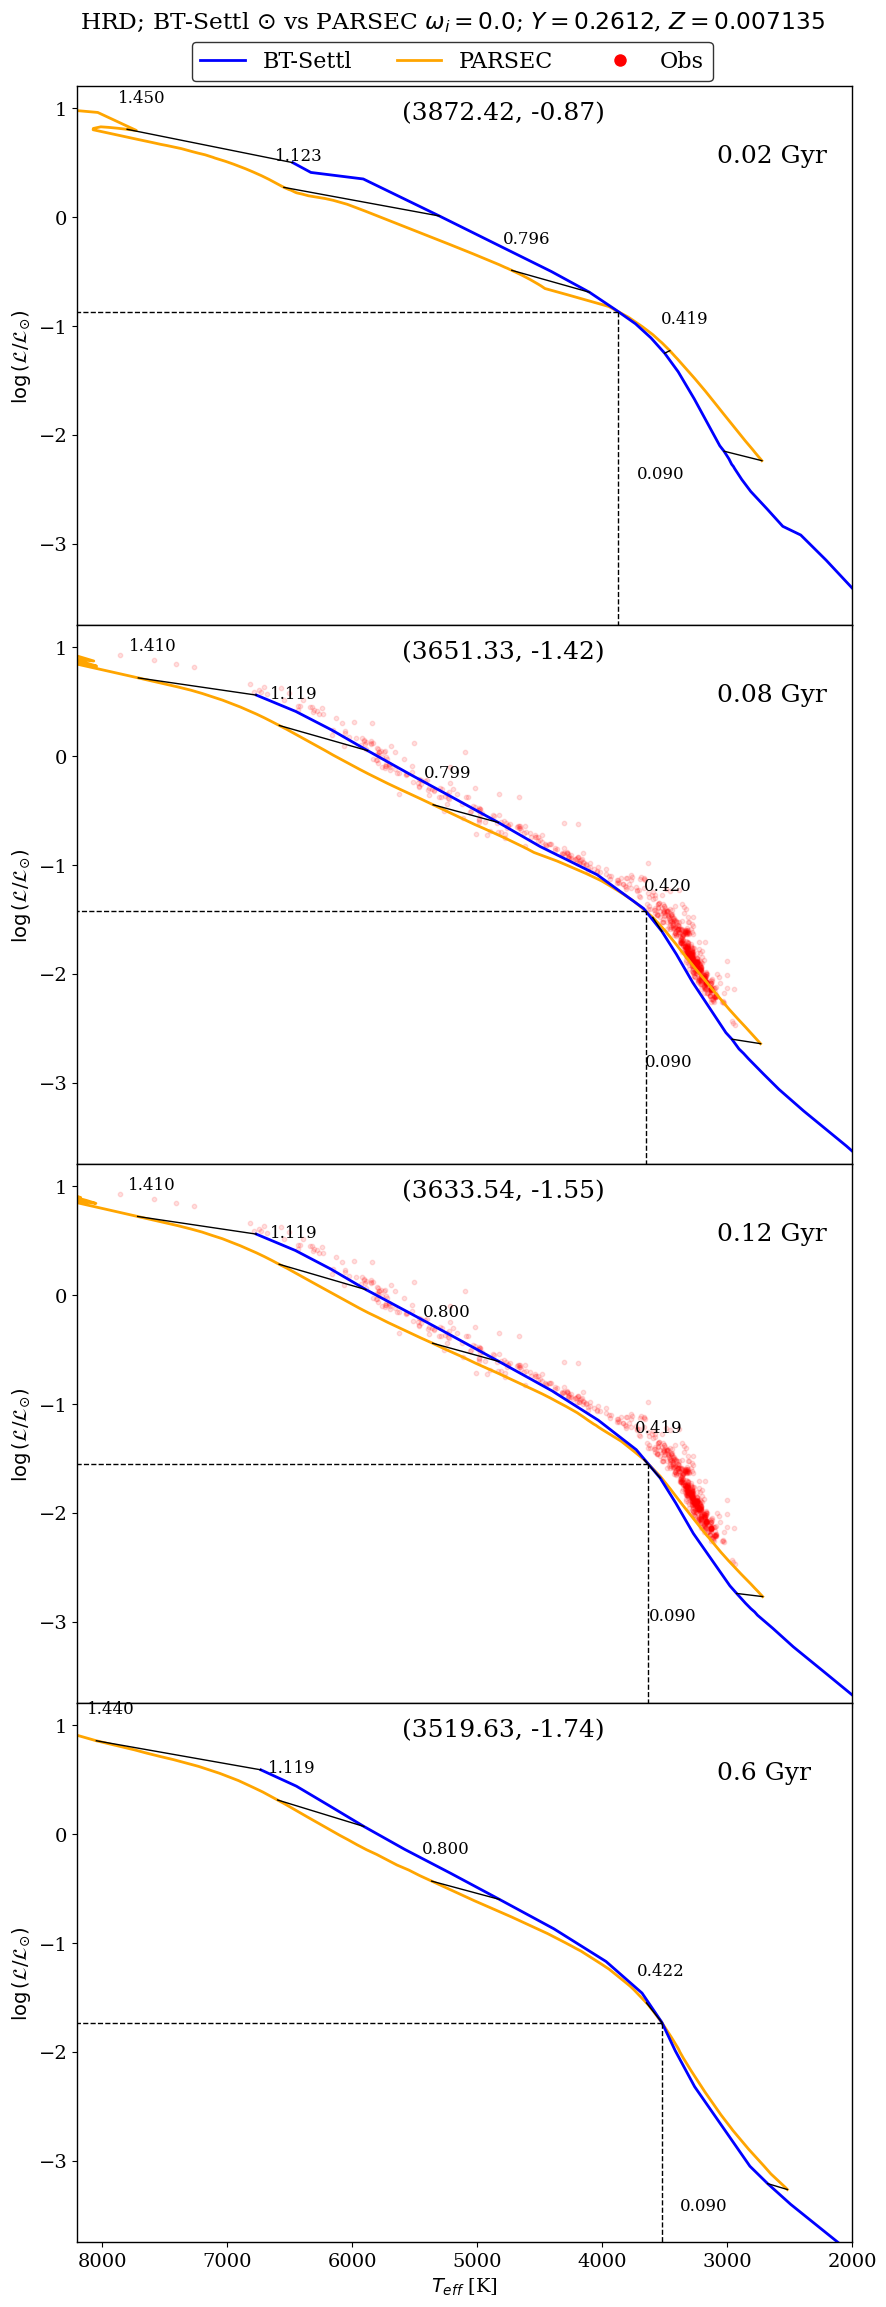

In [192]:
plot_single_column_Teff(BTSettl_Li_isochrones, PARSEC_iso_omega_00_sun_Phot_dict, 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_Teff_x_sun', dpi=350, data_obs=data_obs_Pleiades, obs=True)

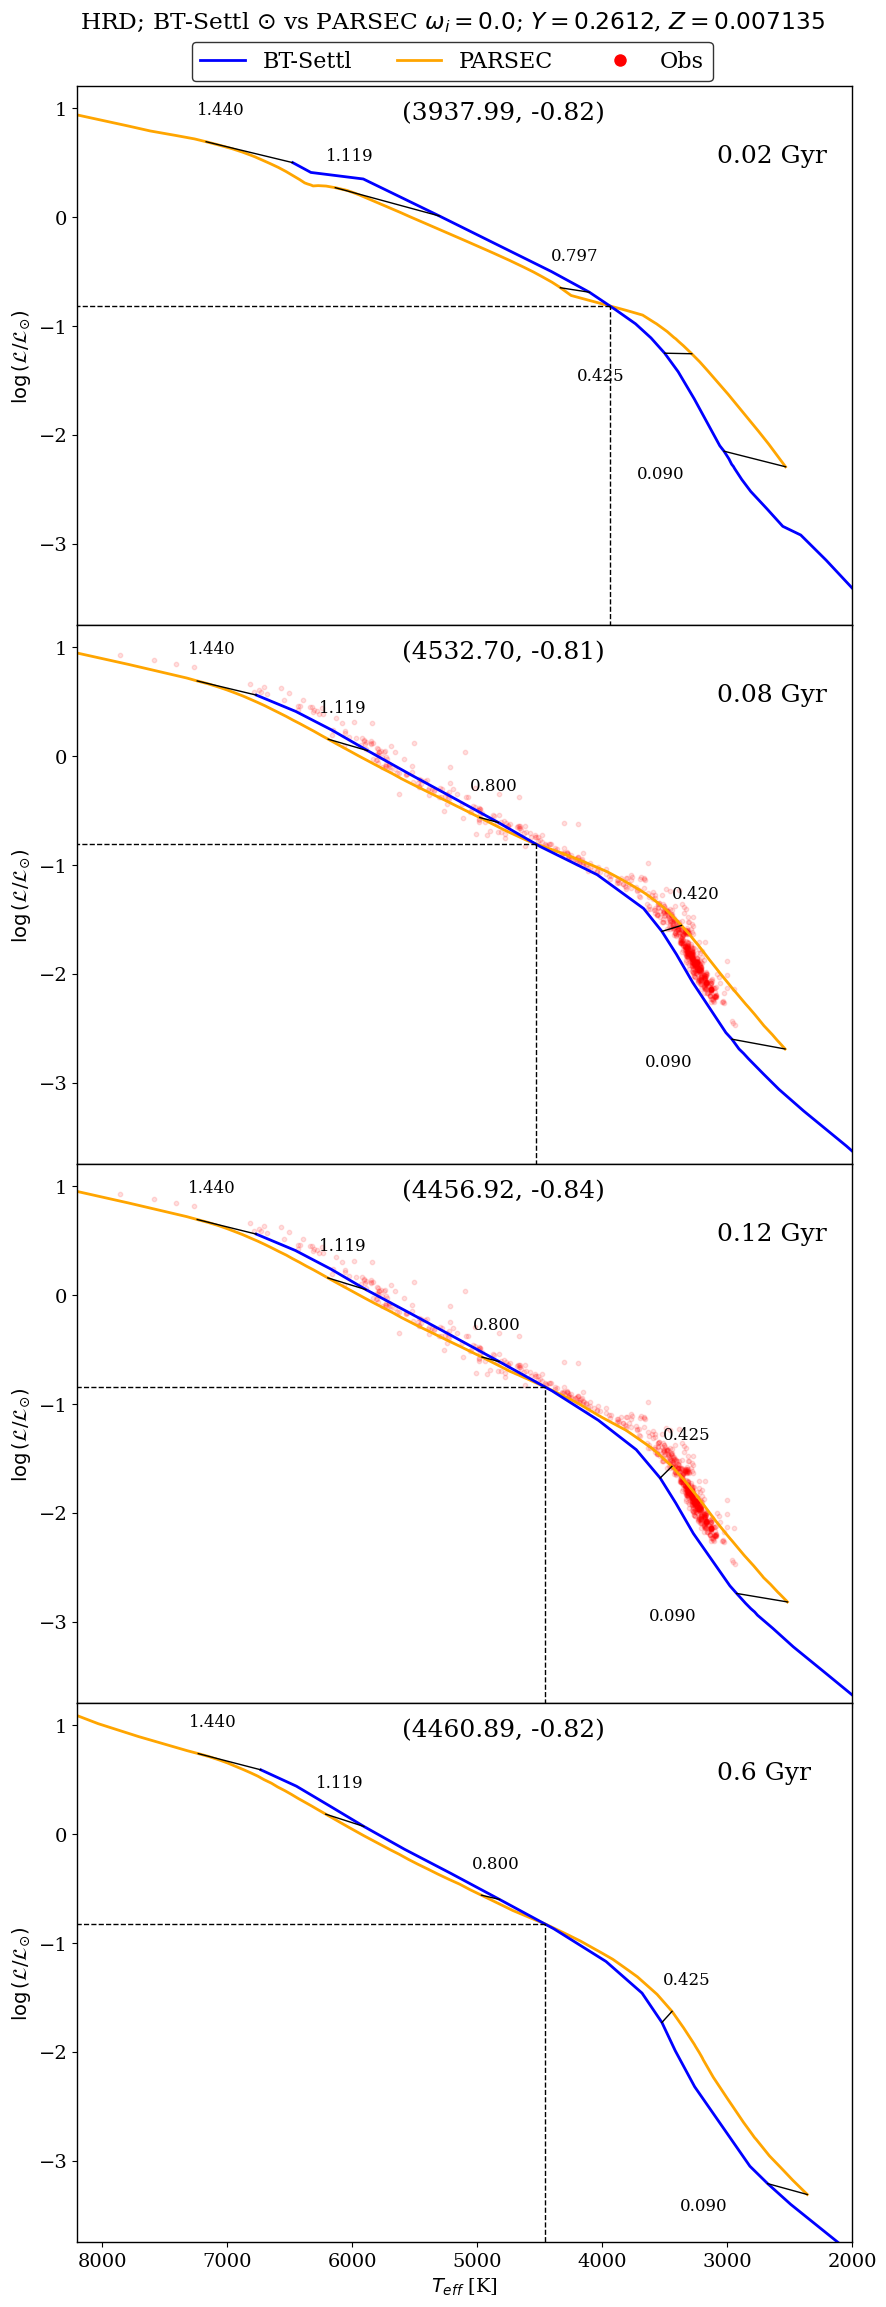

In [193]:
plot_single_column_Teff(BTSettl_Li_isochrones, PARSEC_iso_omega_00_Phot_dict, 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_Teff_x', dpi=350, data_obs=data_obs_Pleiades, obs=True)

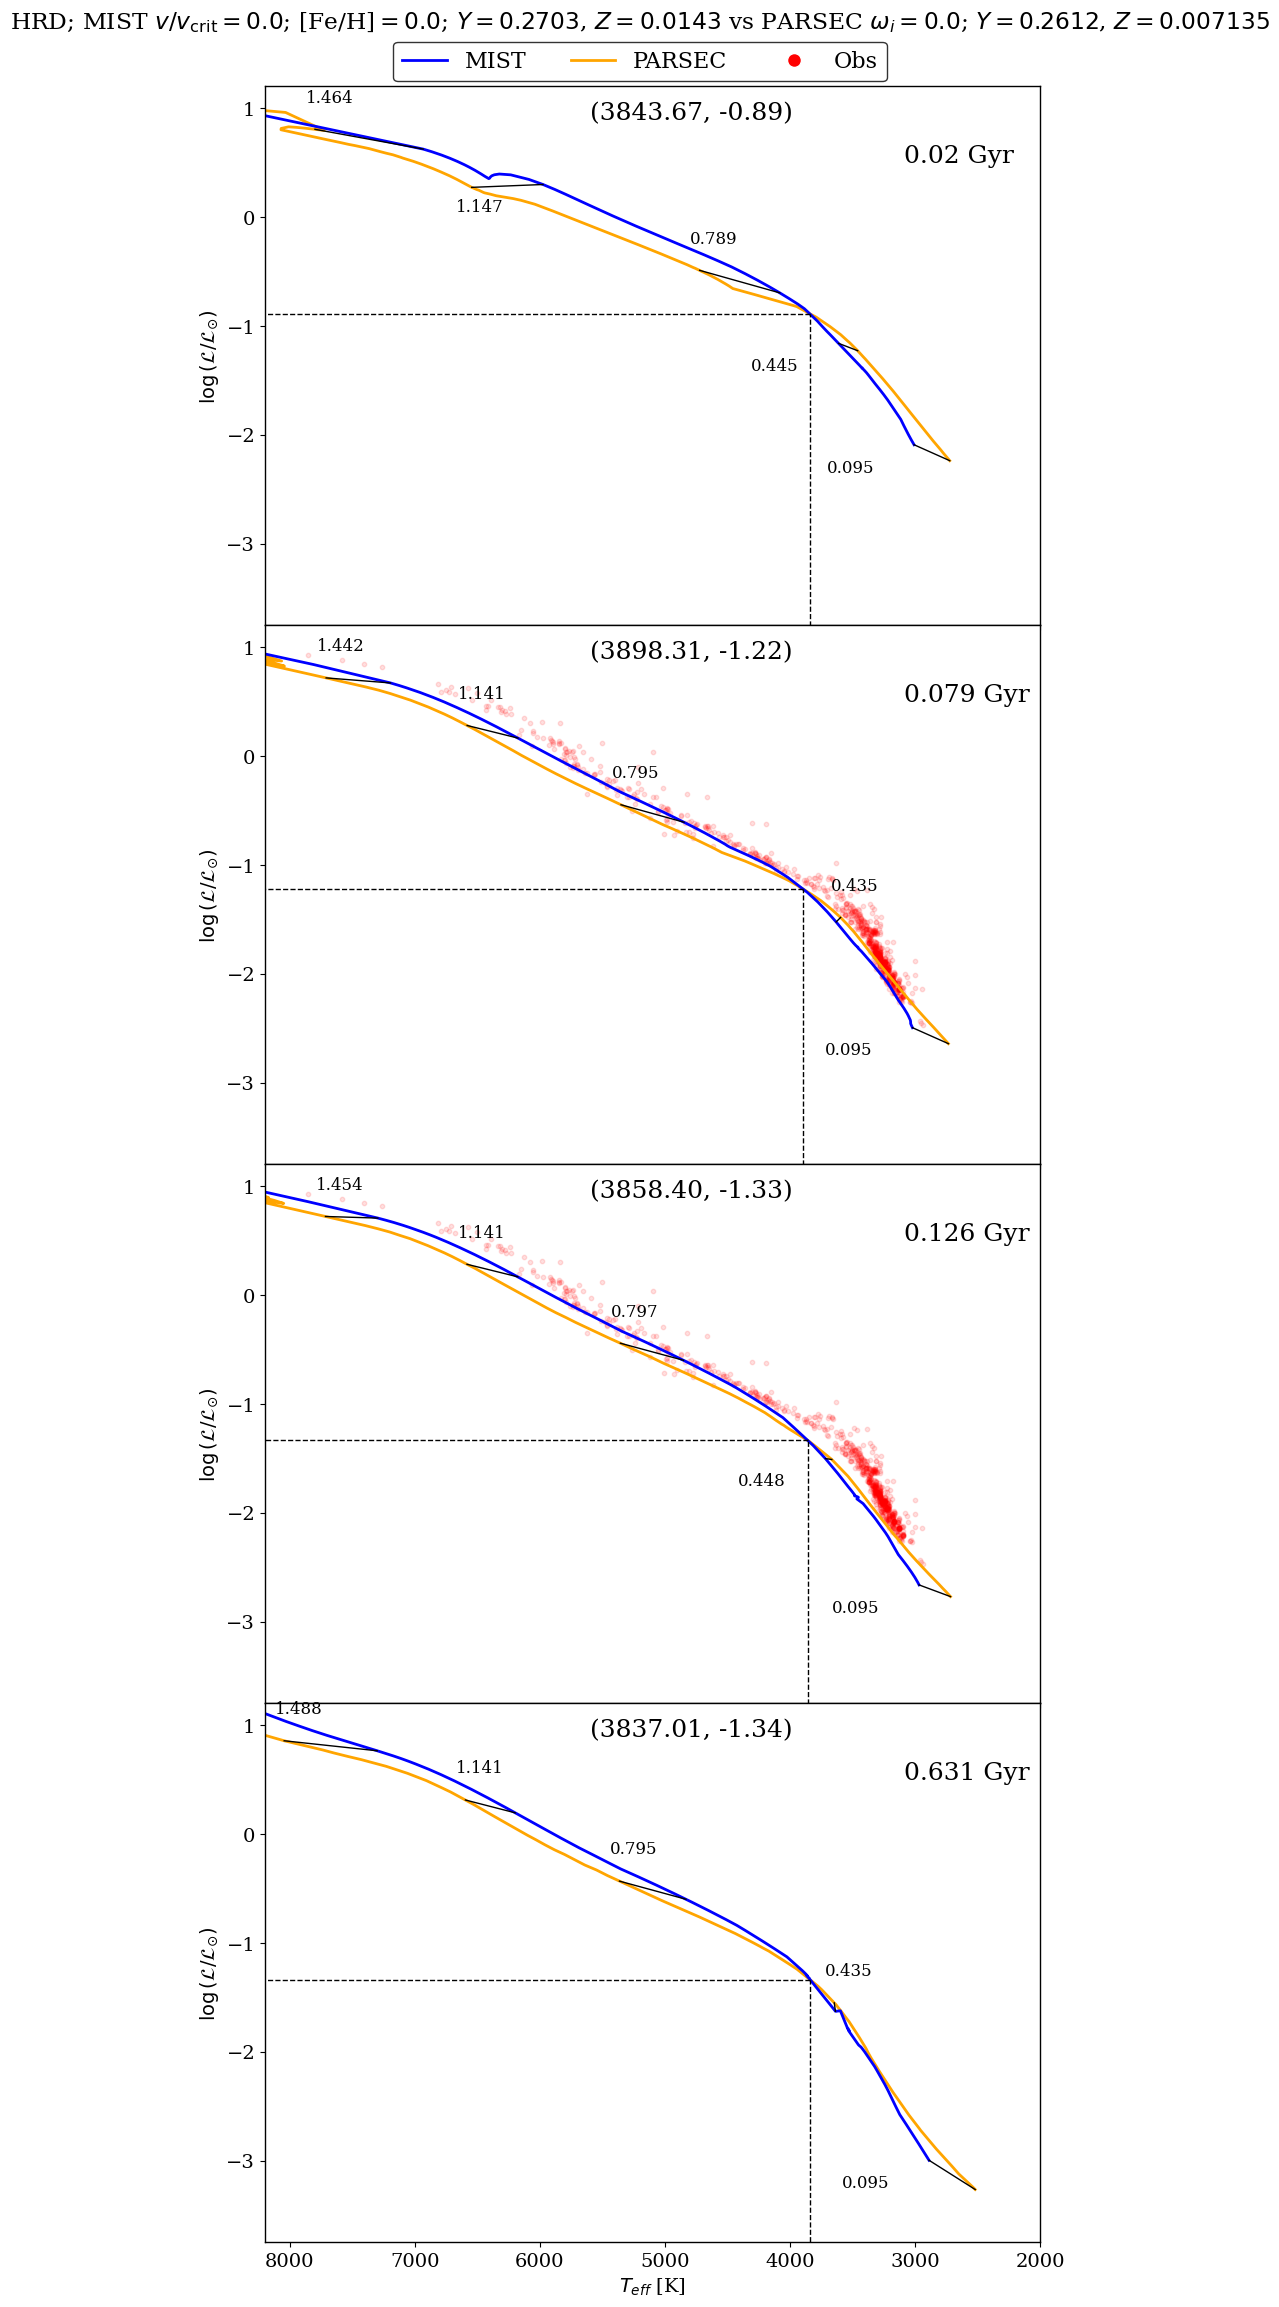

In [194]:
plot_single_column_Teff(MIST_FULL, PARSEC_iso_omega_00_sun_Phot_dict, r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.0$; $Y= 0.2703$, $Z=0.0143$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_Teff_x11', dpi=350, data_obs=data_obs_Pleiades, obs=True)

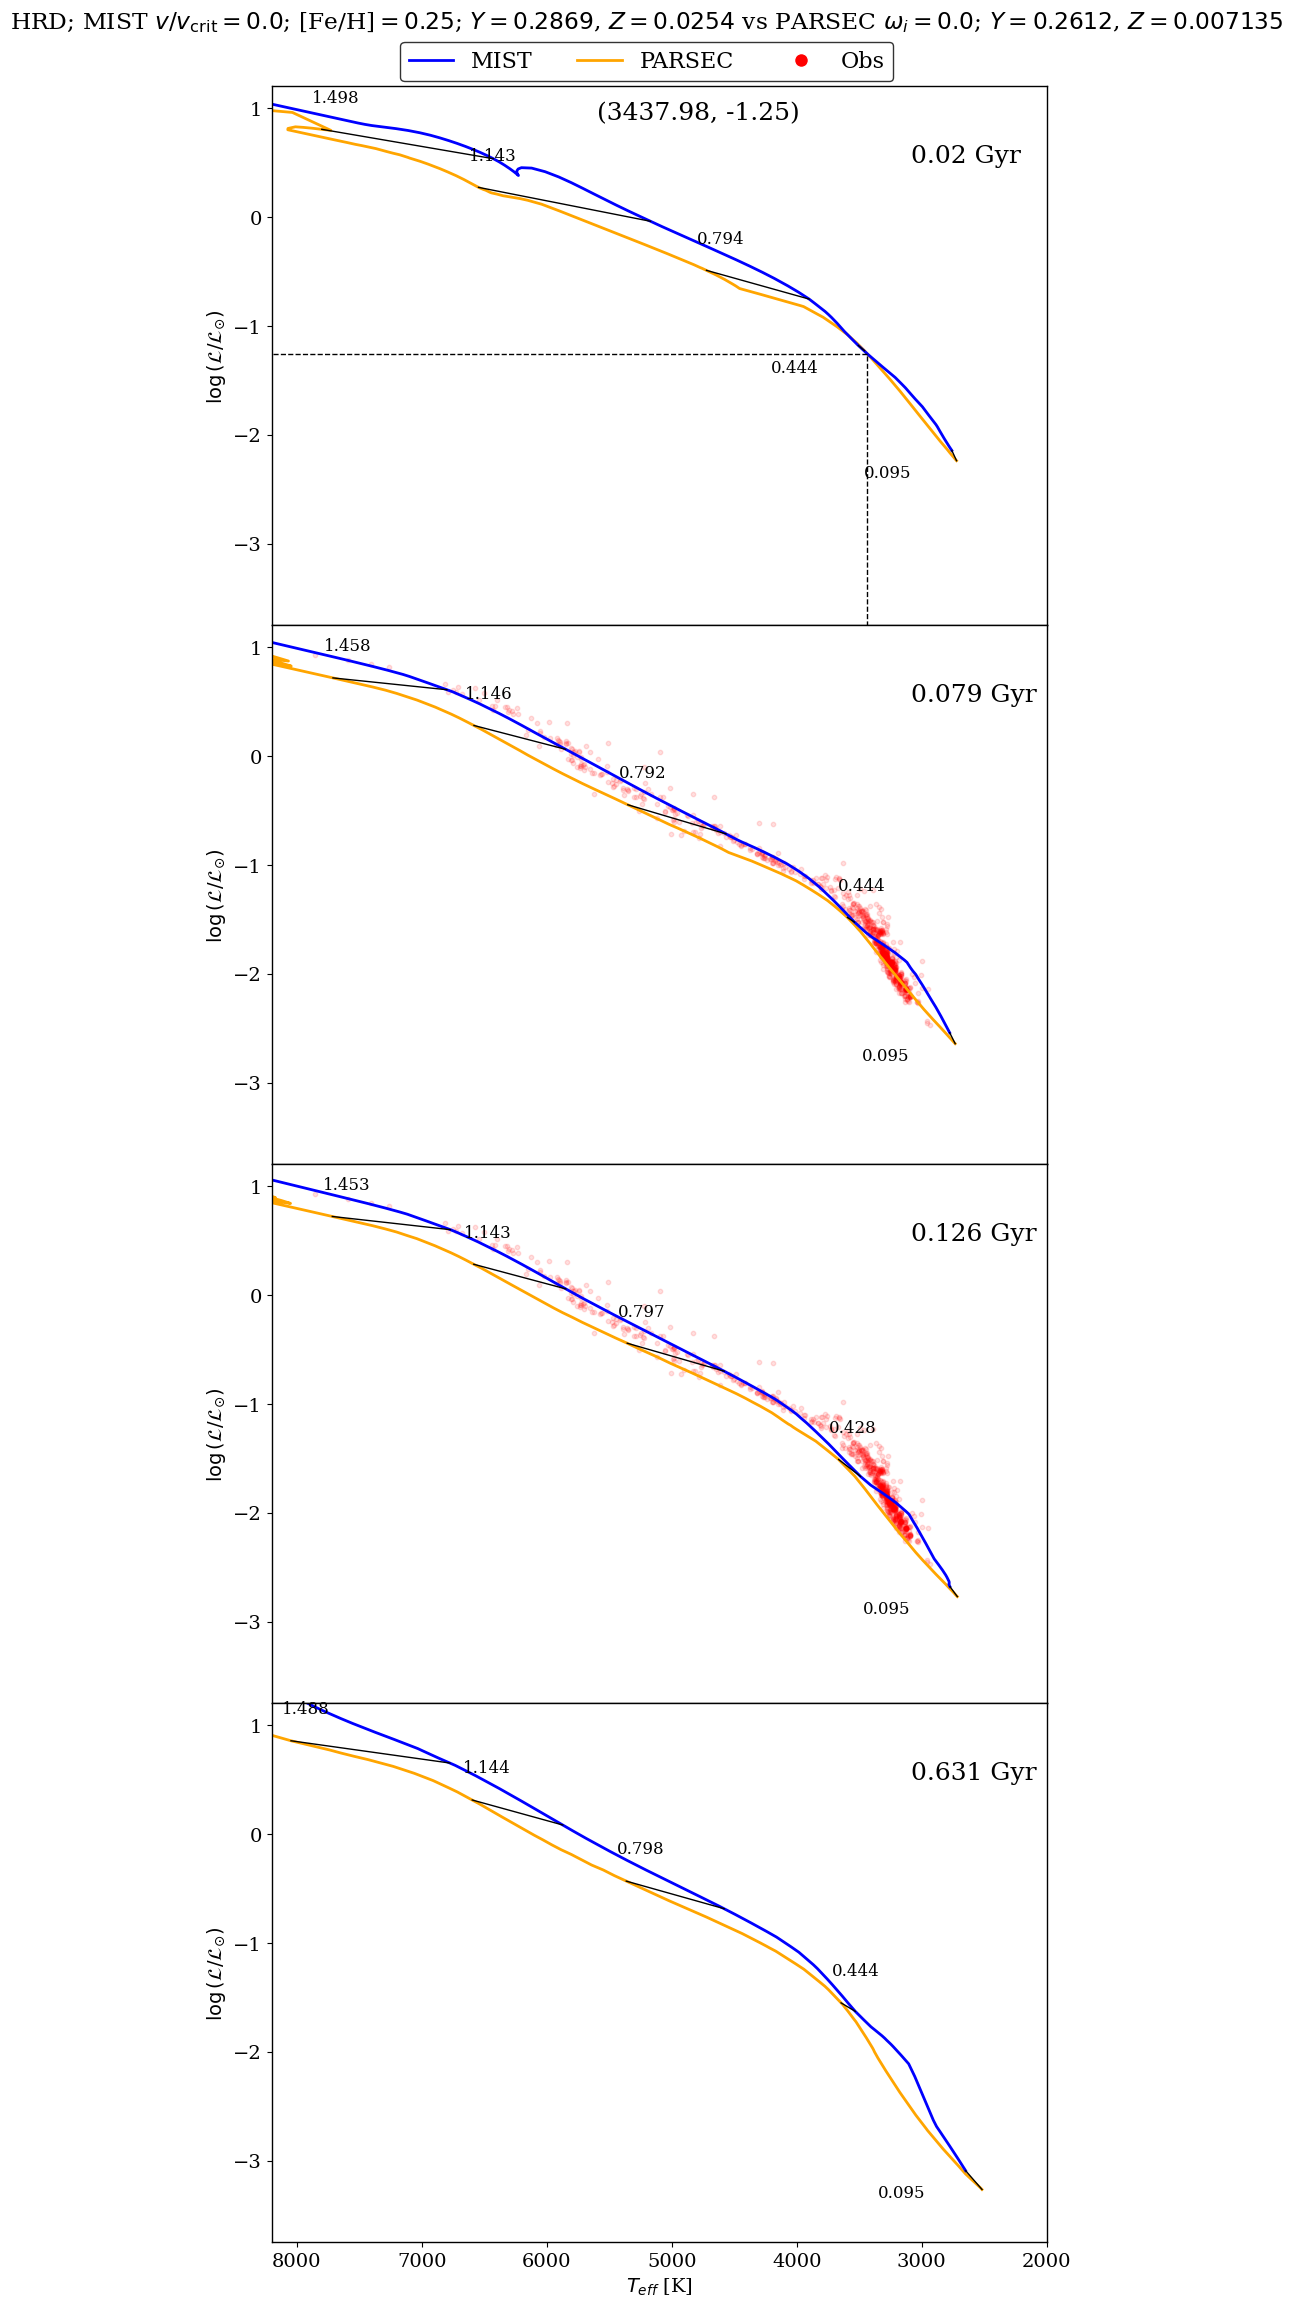

In [195]:
plot_single_column_Teff(MIST_FULL_2, PARSEC_iso_omega_00_sun_Phot_dict, r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.25$; $Y= 0.2869$, $Z=0.0254$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_Teff_x21', dpi=350, data_obs=data_obs_Pleiades, obs=True)

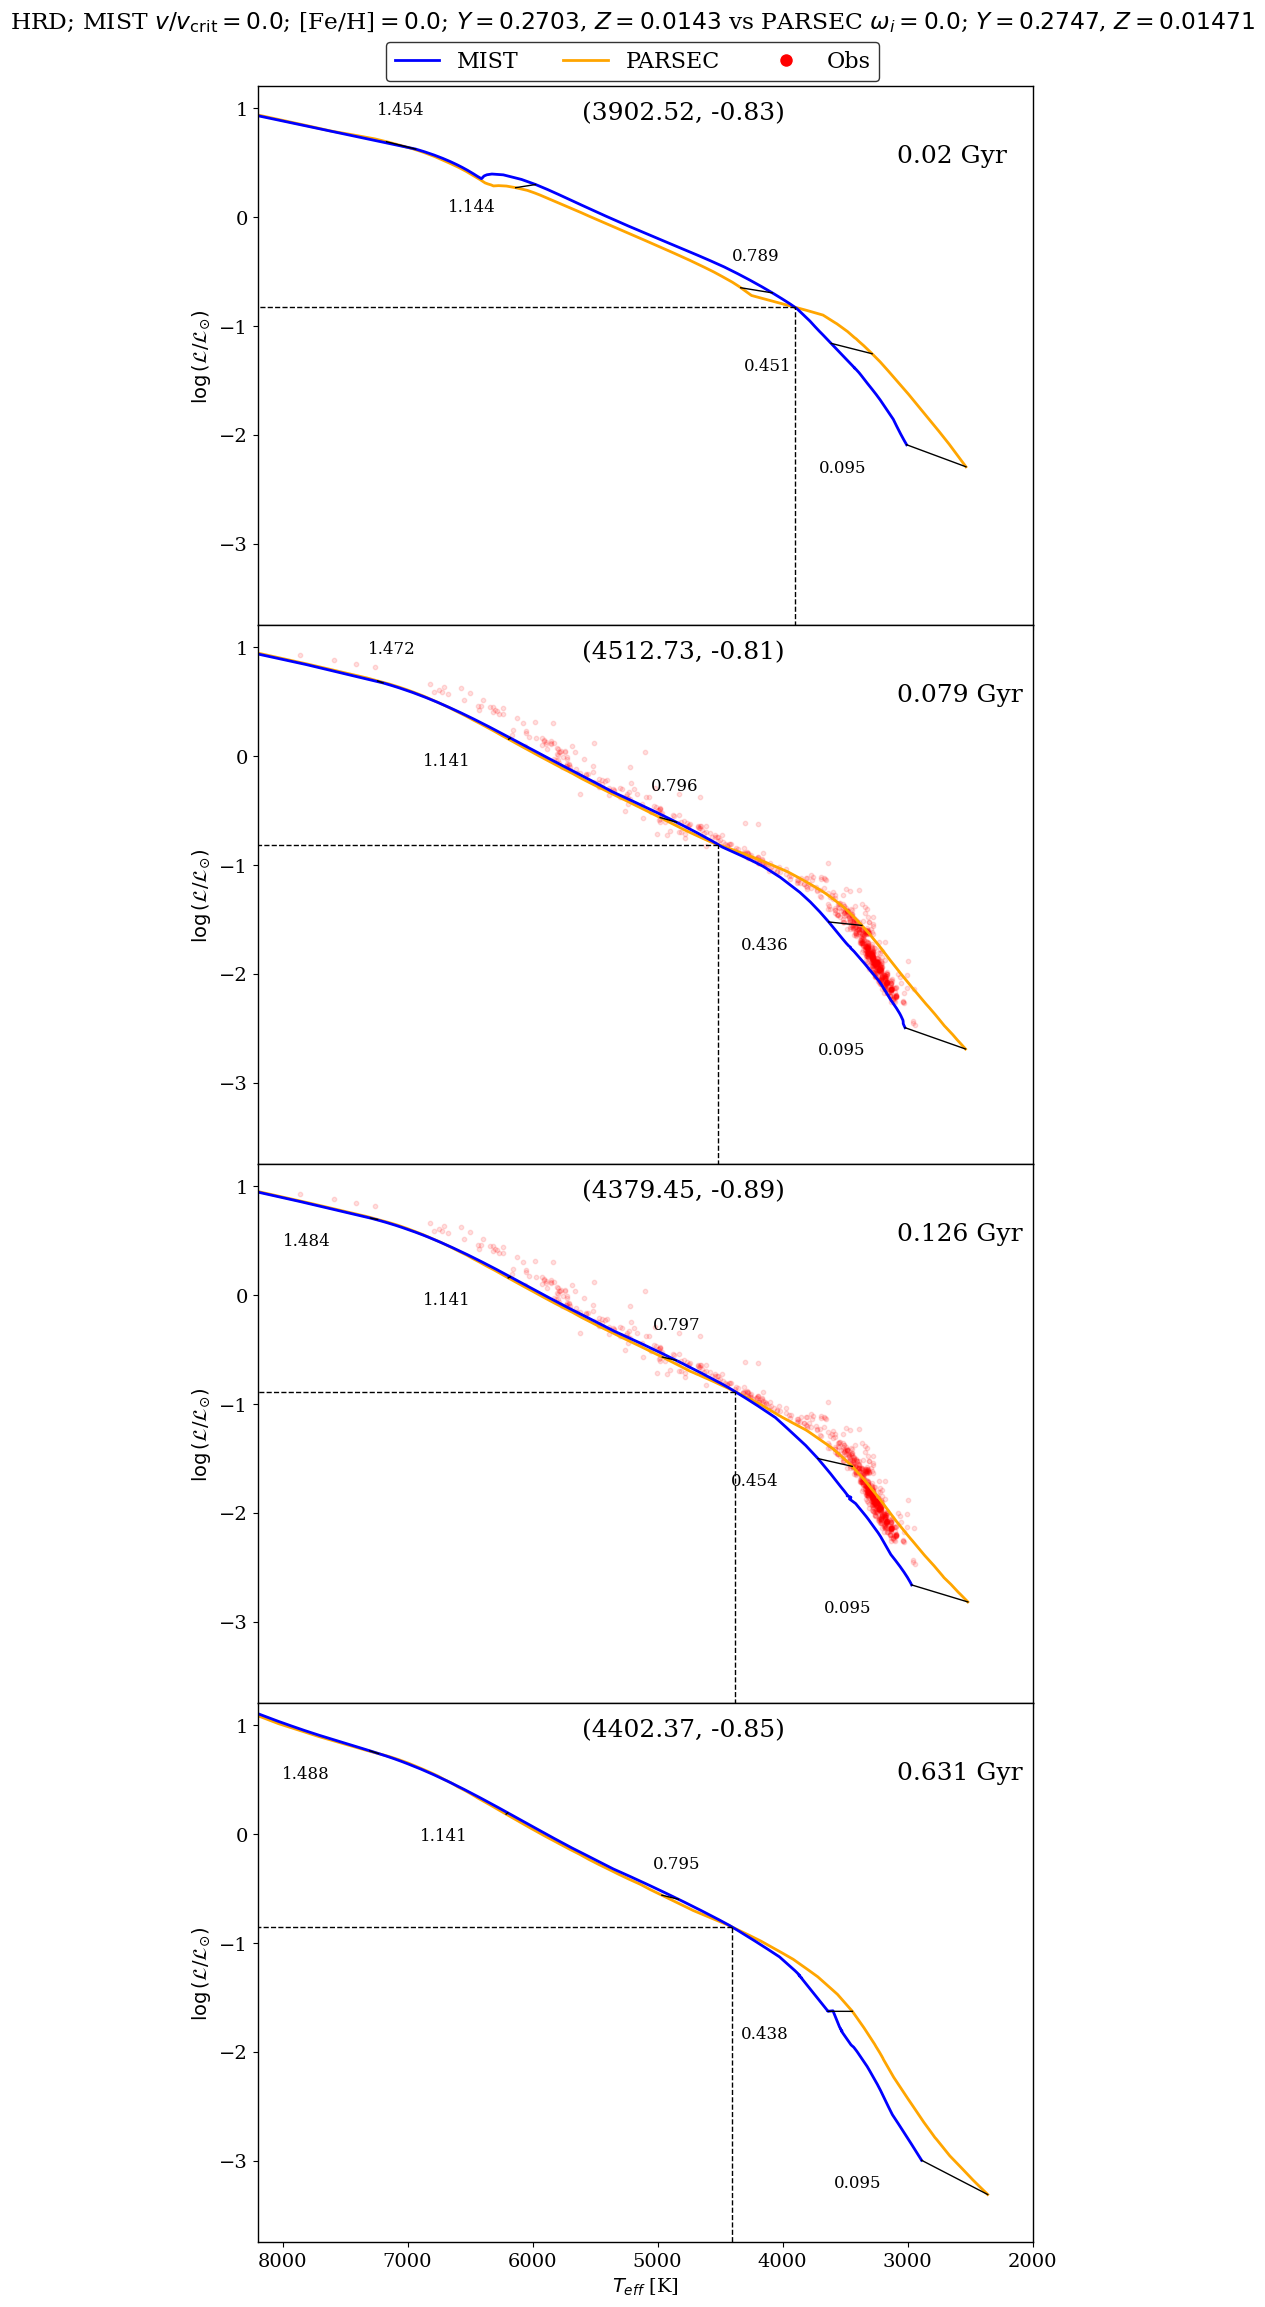

In [204]:
plot_single_column_Teff(MIST_FULL, PARSEC_iso_omega_00_Phot_dict, r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.0$; $Y= 0.2703$, $Z=0.0143$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_Teff_x12', dpi=350, data_obs=data_obs_Pleiades, obs=True)

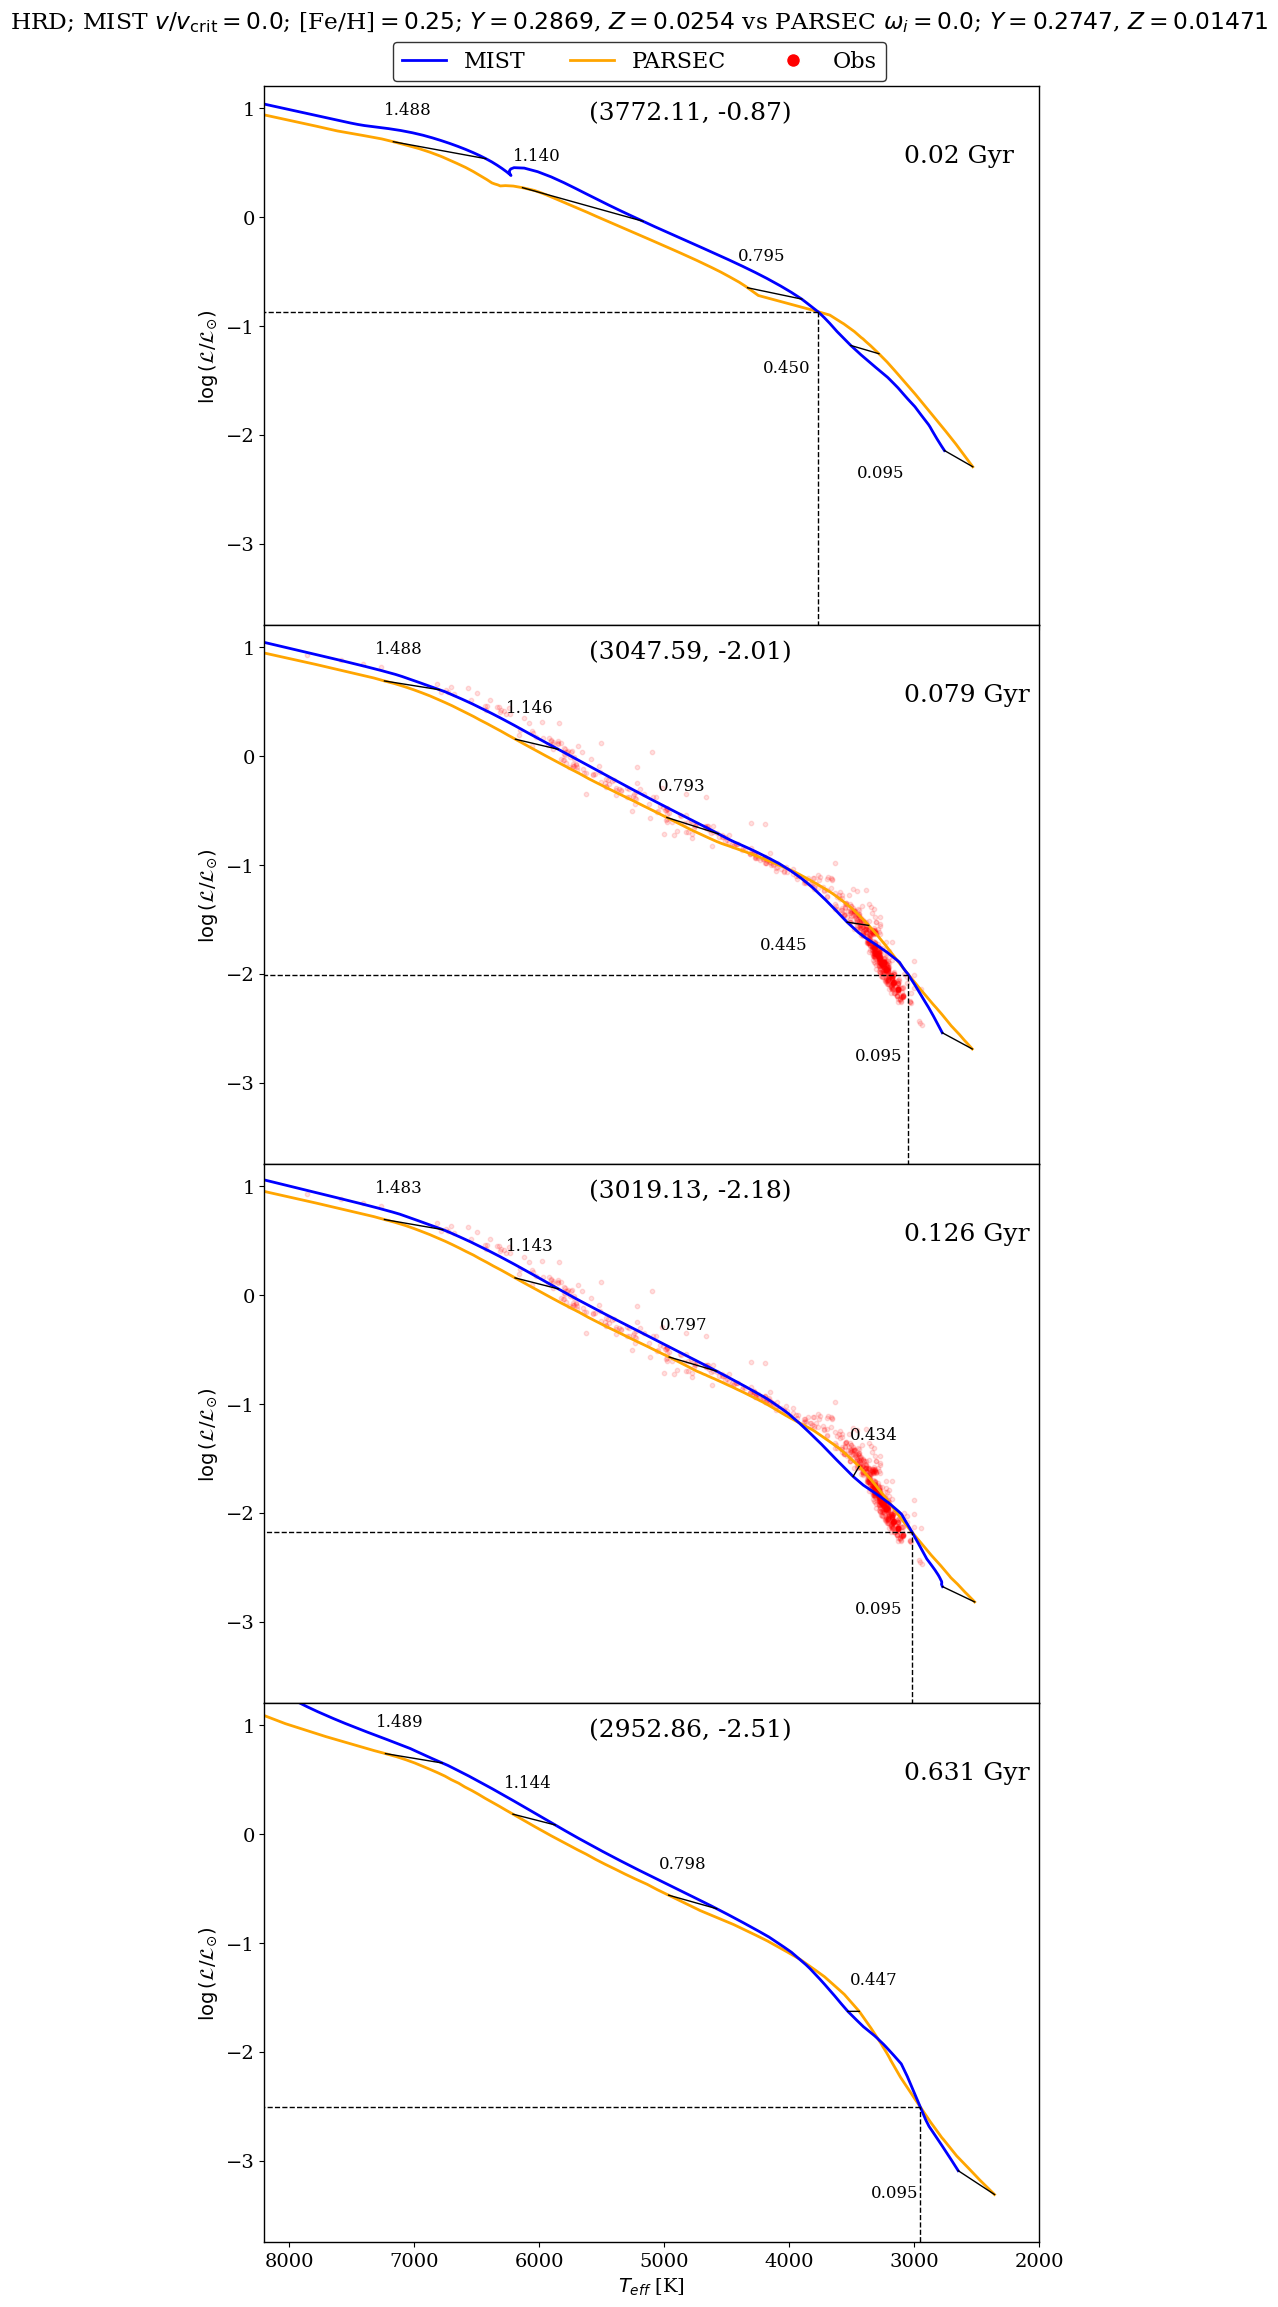

In [205]:
plot_single_column_Teff(MIST_FULL_2, PARSEC_iso_omega_00_Phot_dict, r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.25$; $Y= 0.2869$, $Z=0.0254$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_Teff_x22', dpi=350, data_obs=data_obs_Pleiades, obs=True)

In [70]:
#plot_single_column_Teff(BTSettl_Li_isochrones, PARSEC_iso_omega_00_sun_Phot_dict, 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_Teff_x_sun', dpi=350, data_obs=data_obs_Pleiades, obs=True)

In [71]:
#plot_single_column_Teff(BTSettl_Li_isochrones, PARSEC_iso_omega_00_Phot_dict, 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_Teff_x', dpi=350, data_obs=data_obs_Pleiades, obs=True)

In [72]:
#plot_single_column_Teff(MIST_00_00, PARSEC_iso_omega_00_Phot_dict, r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.0$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_Teff_x', dpi=350, data_obs=data_obs_Pleiades, obs=True)

In [73]:
#plot_isochrones_grid(BTSettl_Li_isochrones, PARSEC_iso_omega_00_Phot_dict, bands1, bands2, 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_comparison', data_obs=data_obs_Pleiades, obs=True)

In [191]:
#plot_isochrones_grid(BTSettl_Li_isochrones, MIST_FULL, bands1, bands1, 'BT-Settl $\odot$', r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.0$; $Y= 0.2703$, $Z=0.0143$', filename='model_comparison', data_obs=data_obs_Pleiades, obs=True)


In [190]:
#plot_isochrones_grid(BTSettl_Li_isochrones, MIST_FULL_2, bands1, bands1, 'BT-Settl $\odot$', r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.25$; $Y= 0.2869$, $Z=0.0254$', filename='model_comparison_2', data_obs=data_obs_Pleiades, obs=True)


In [189]:
#plot_isochrones_grid(MIST_FULL, PARSEC_iso_omega_00_Phot_dict, bands1, bands2, r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.25$; $Y= 0.2703$, $Z=0.0143$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_comparison', data_obs=data_obs_Pleiades, obs=True)


In [188]:
#plot_isochrones_grid(MIST_FULL_2, PARSEC_iso_omega_00_Phot_dict, bands1, bands2, r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.25$; $Y= 0.2869$, $Z=0.0254$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_comparison_2', data_obs=data_obs_Pleiades, obs=True)


In [78]:
#plot_single_column(BTSettl_Li_isochrones, PARSEC_iso_omega_00_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_color', dpi=350, data_obs=data_obs_Pleiades, obs=True)

In [79]:
#plot_single_column(BTSettl_Li_isochrones, PARSEC_iso_omega_00_sun_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_color_sun', dpi=350, data_obs=data_obs_Pleiades, obs=True)

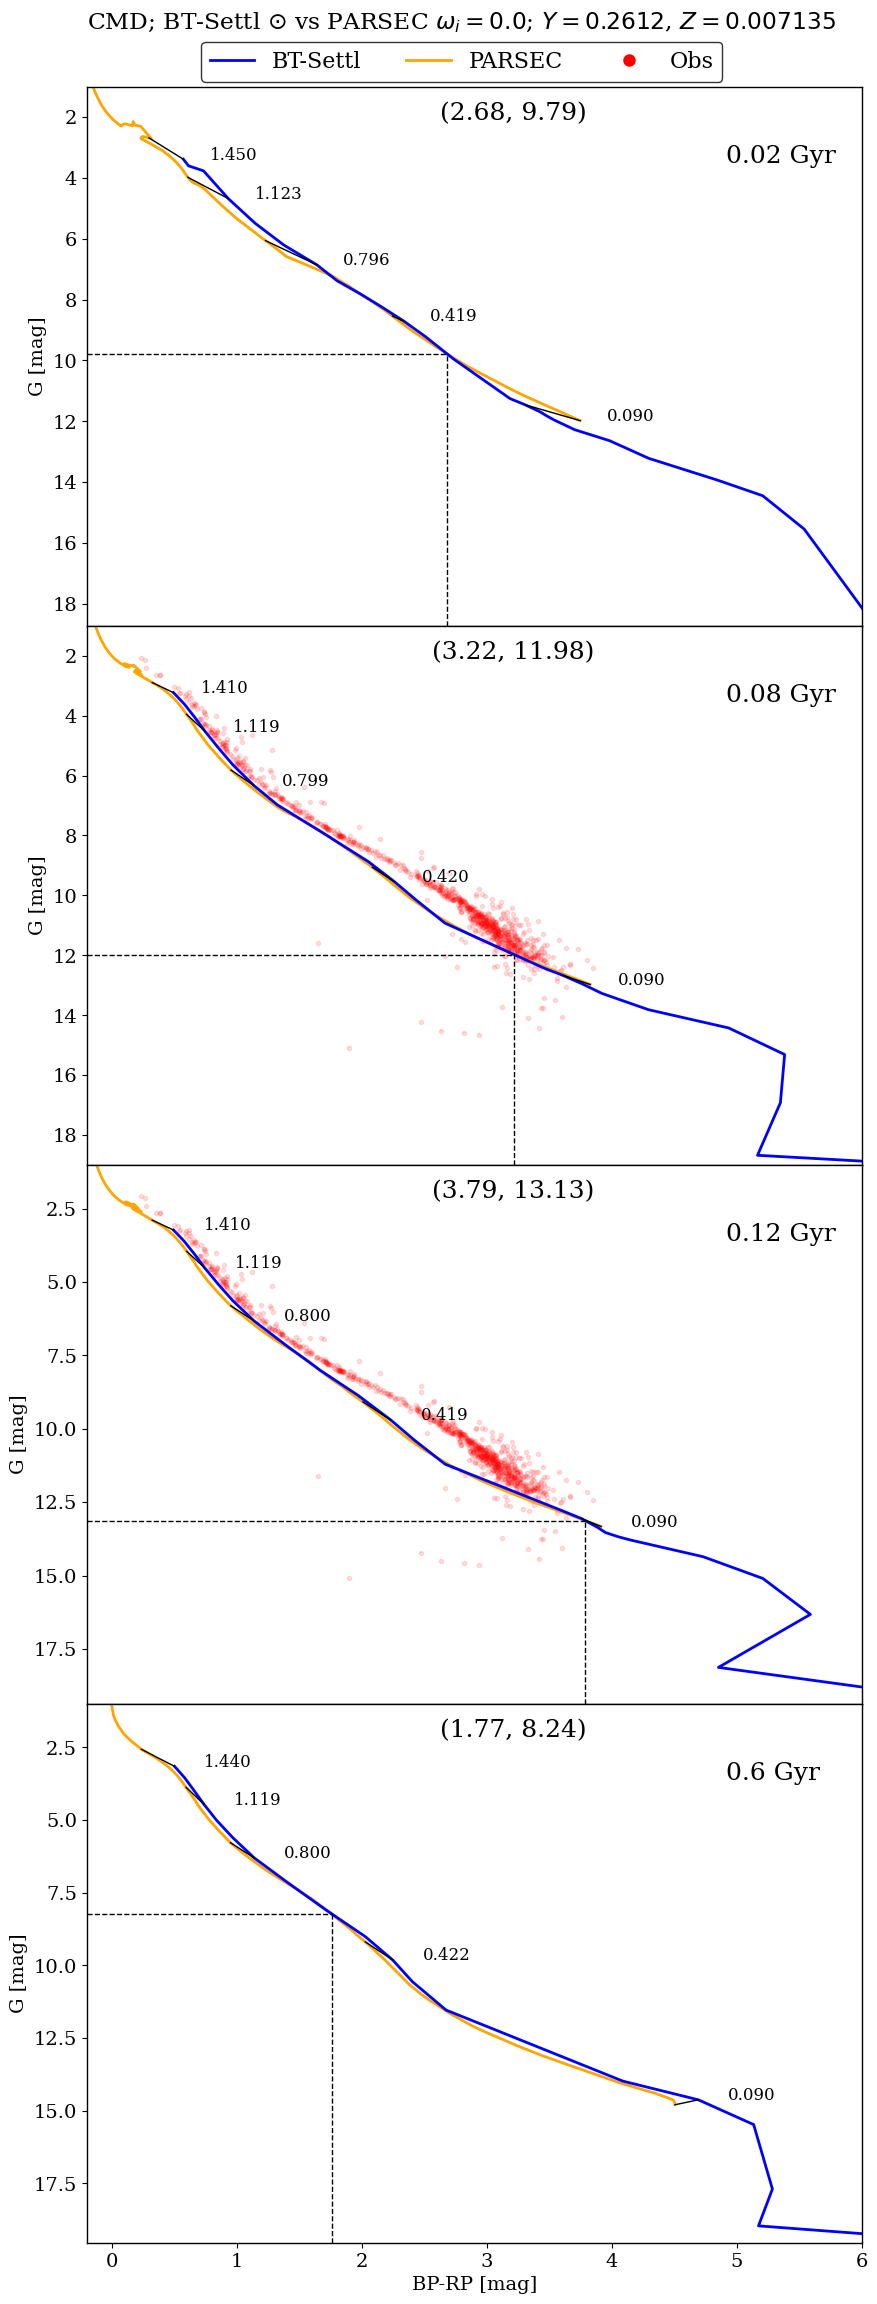

In [199]:
plot_single_column(BTSettl_Li_isochrones, PARSEC_iso_omega_00_sun_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_color_x_sun', dpi=350, data_obs=data_obs_Pleiades, obs=True)

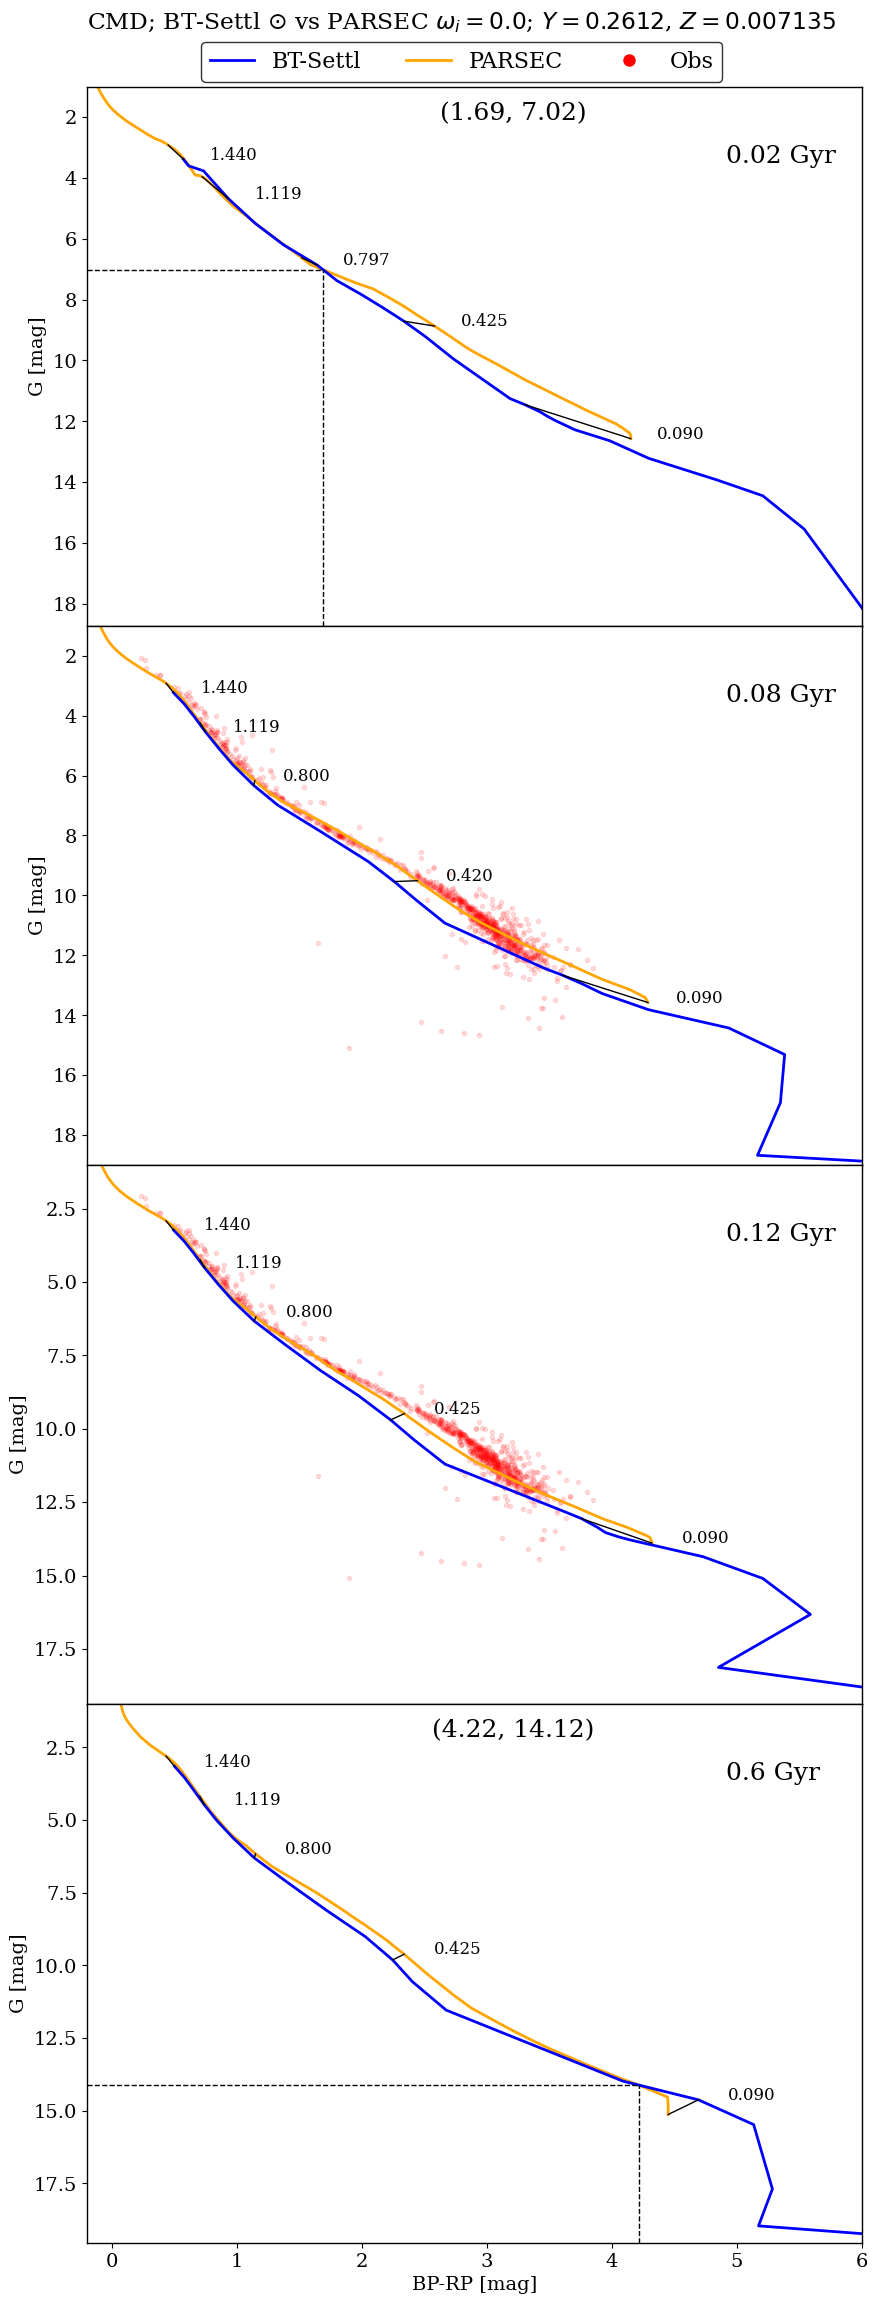

In [201]:
plot_single_column(BTSettl_Li_isochrones, PARSEC_iso_omega_00_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], 'BT-Settl $\odot$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_color_x', dpi=350, data_obs=data_obs_Pleiades, obs=True)

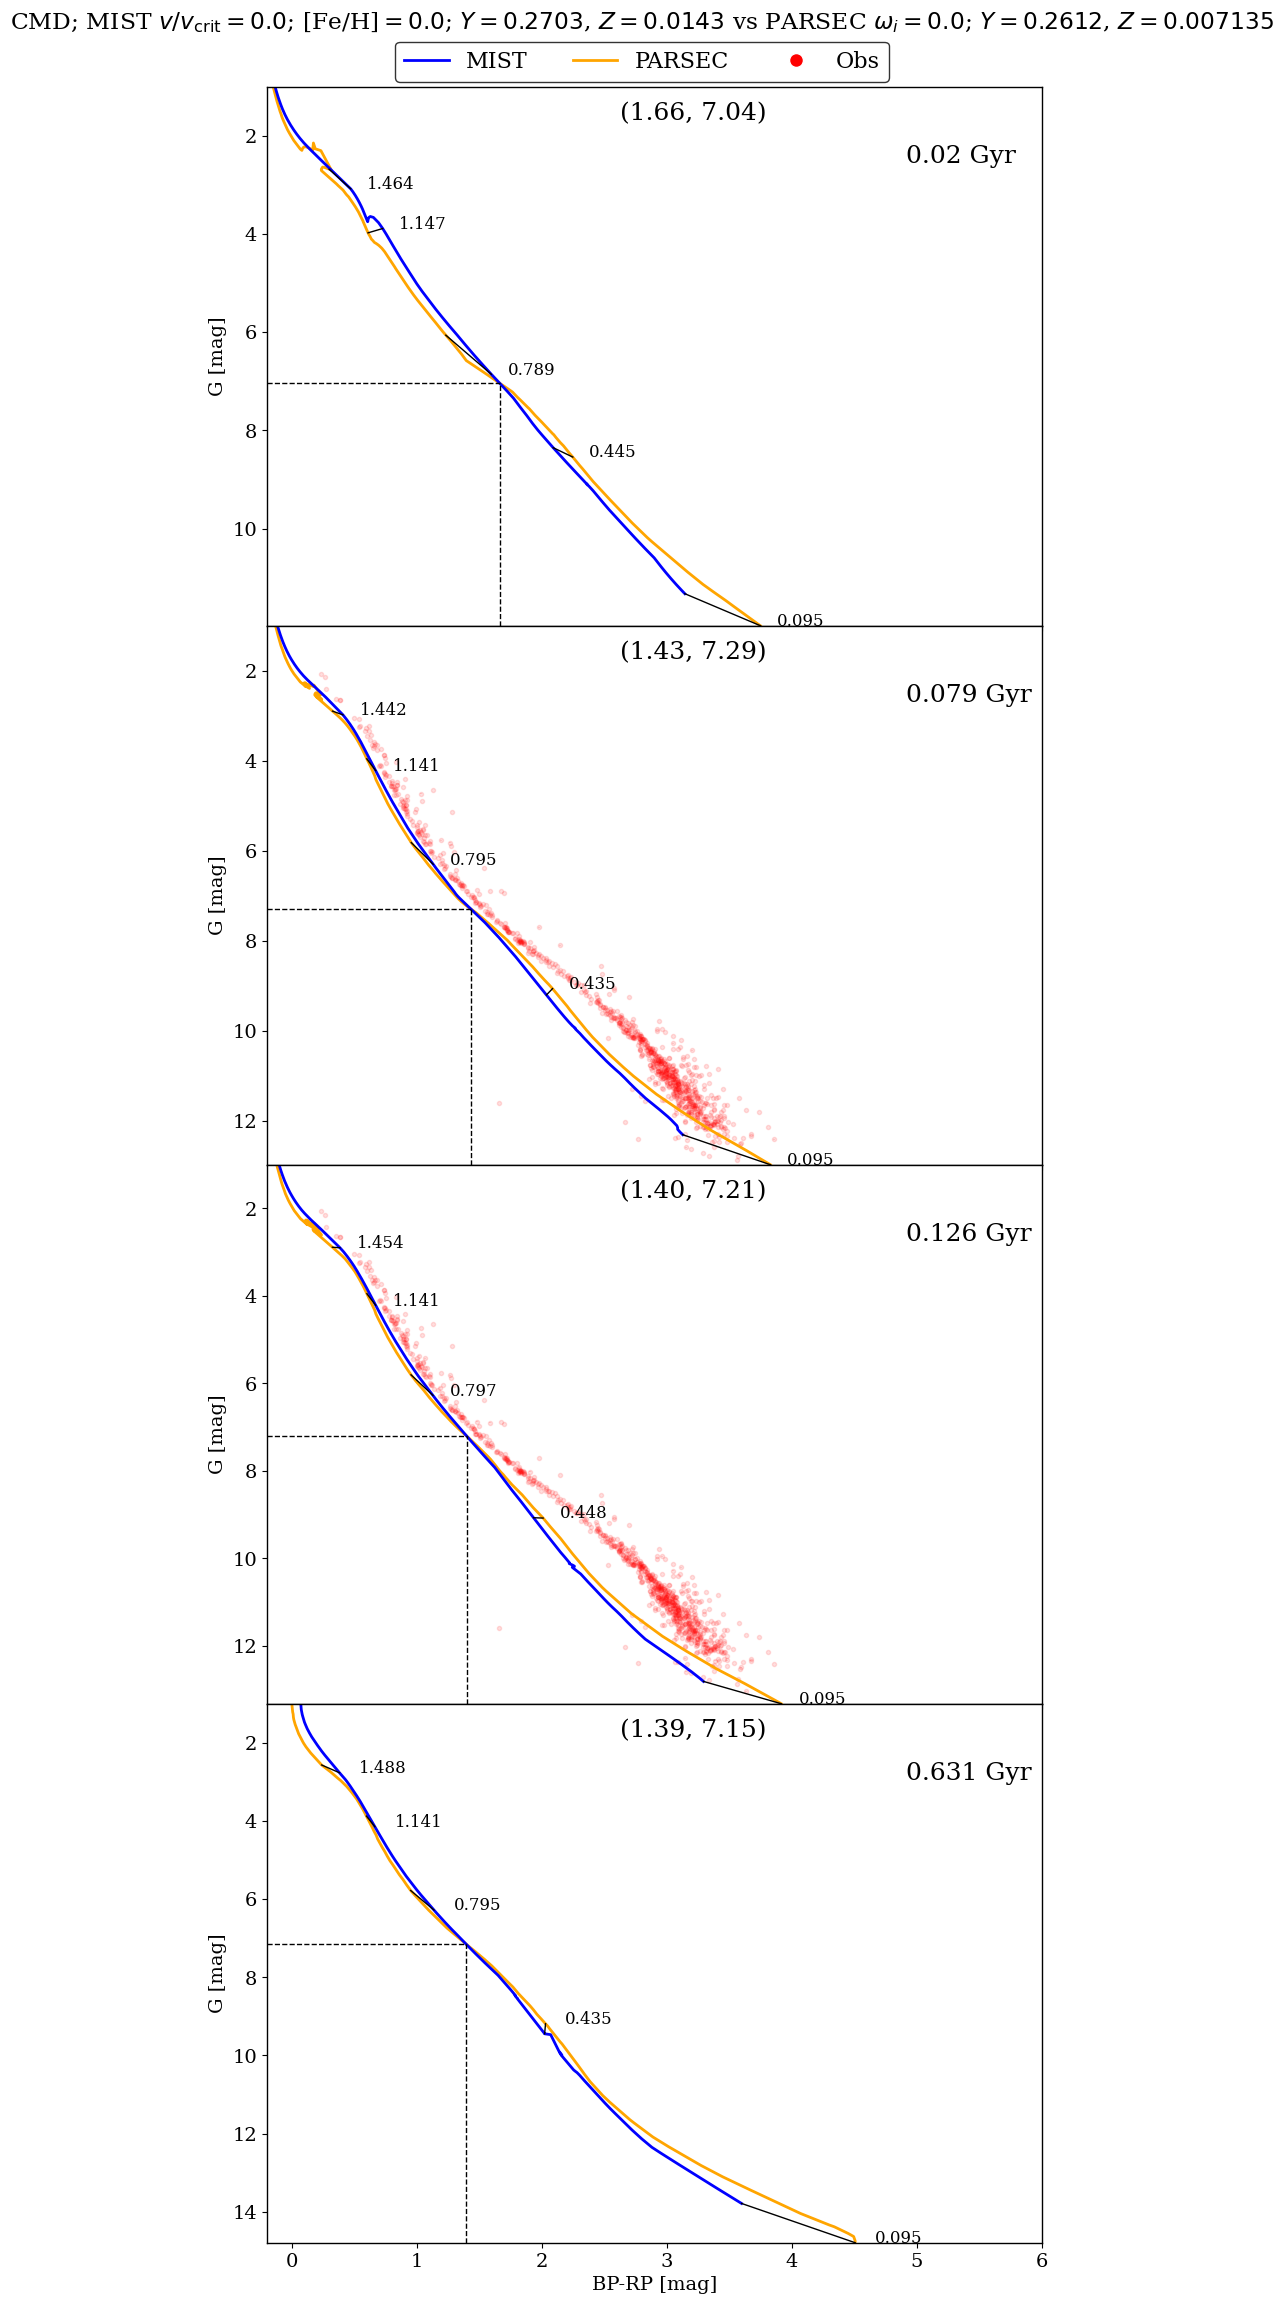

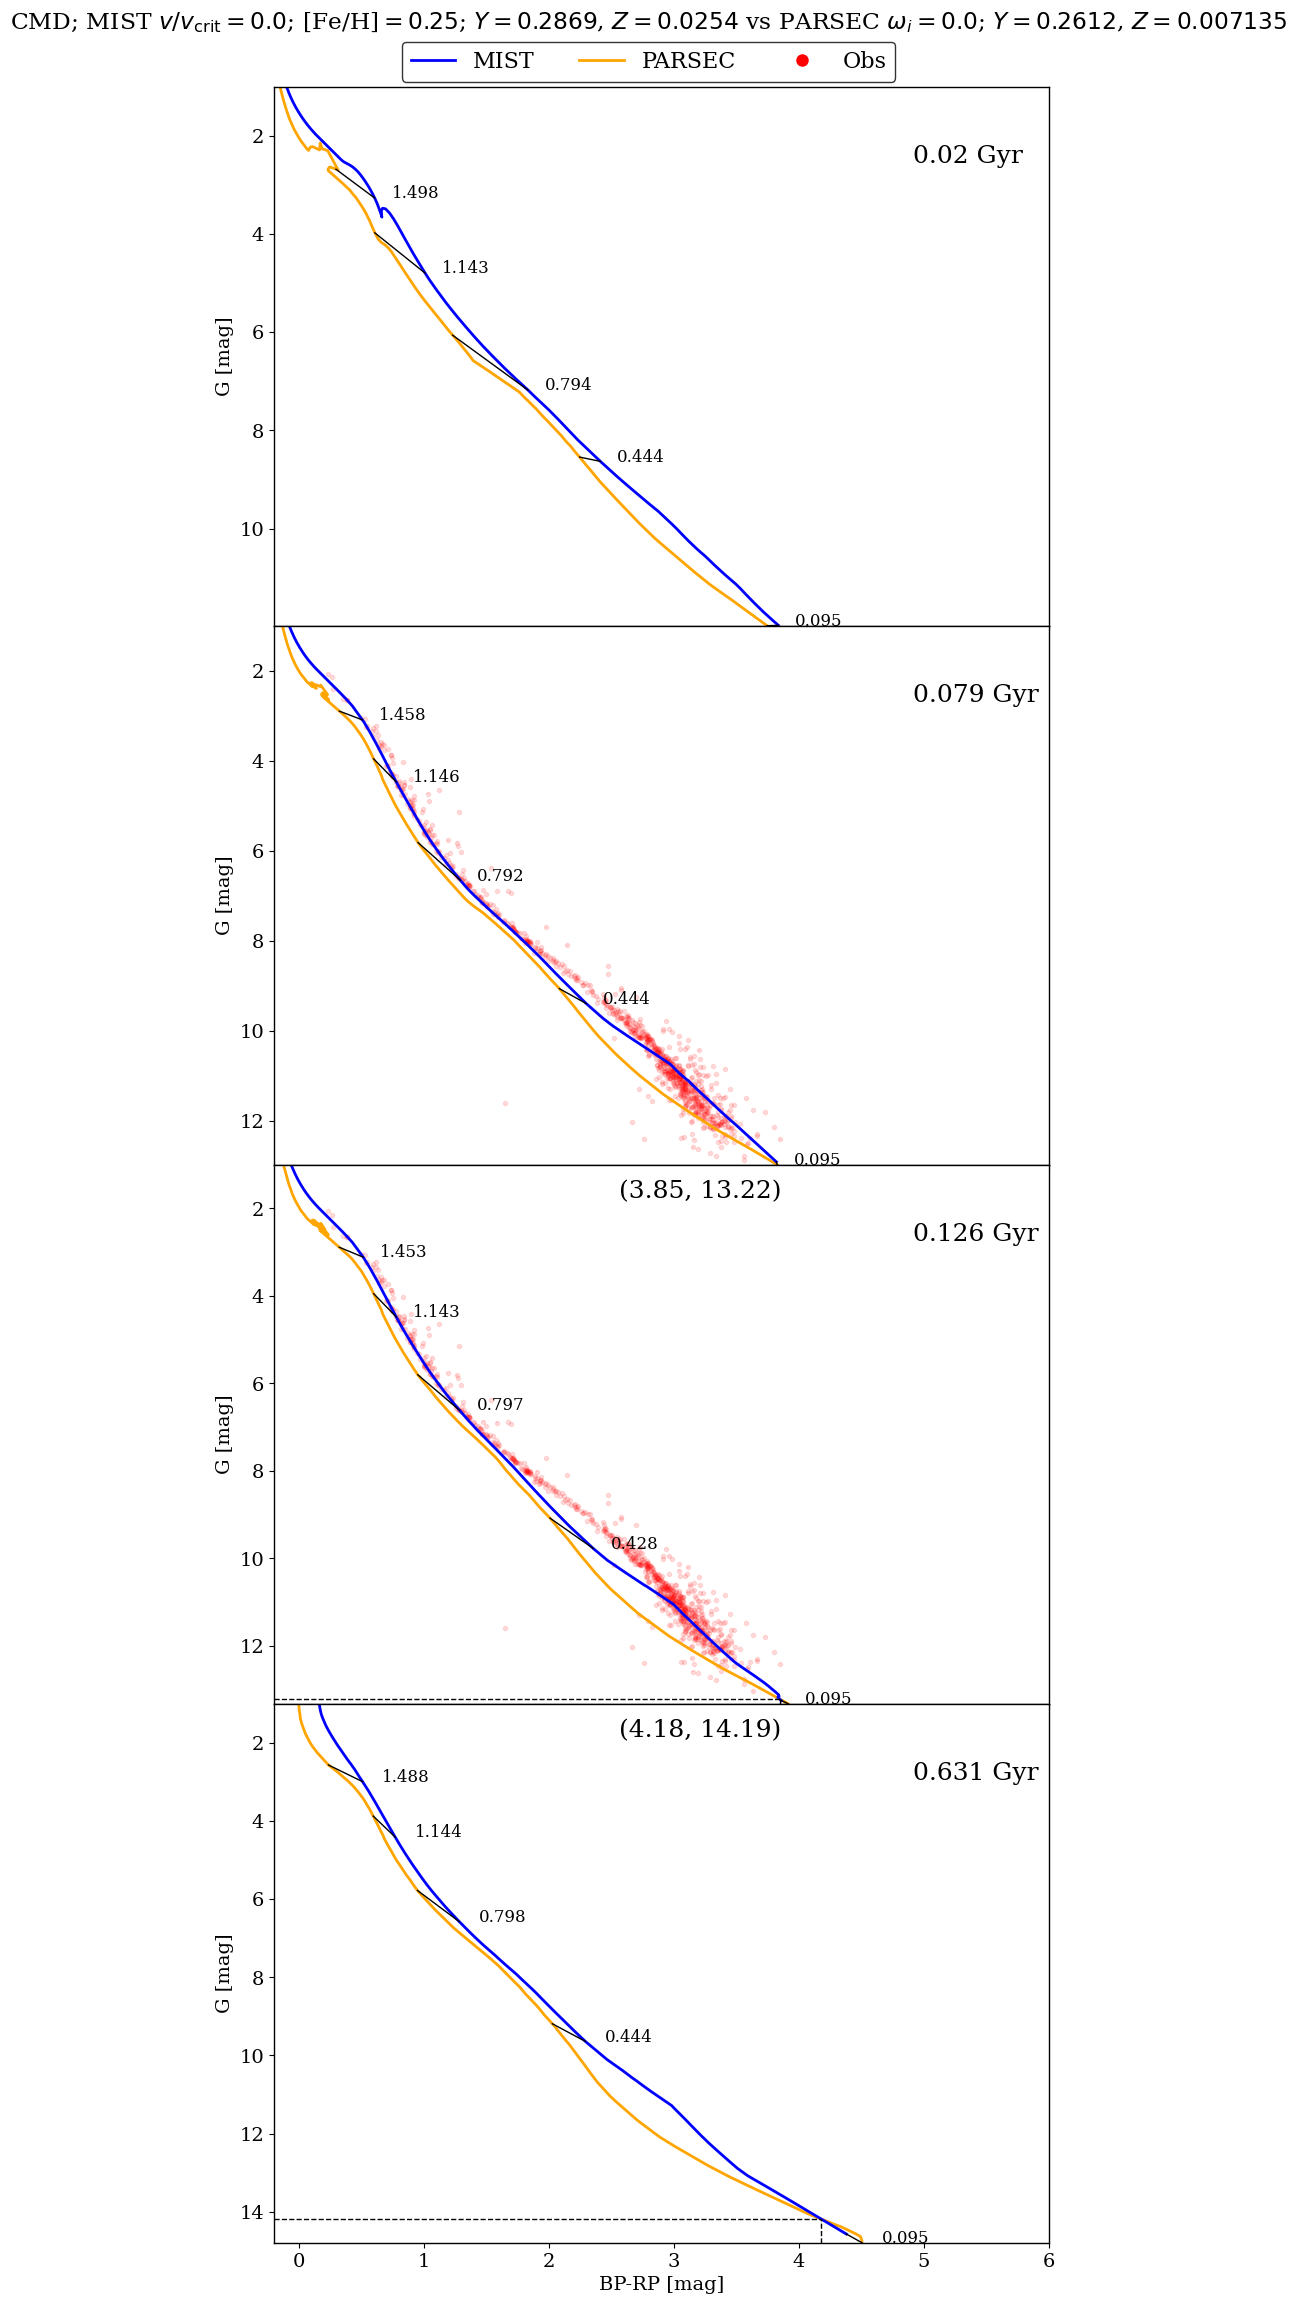

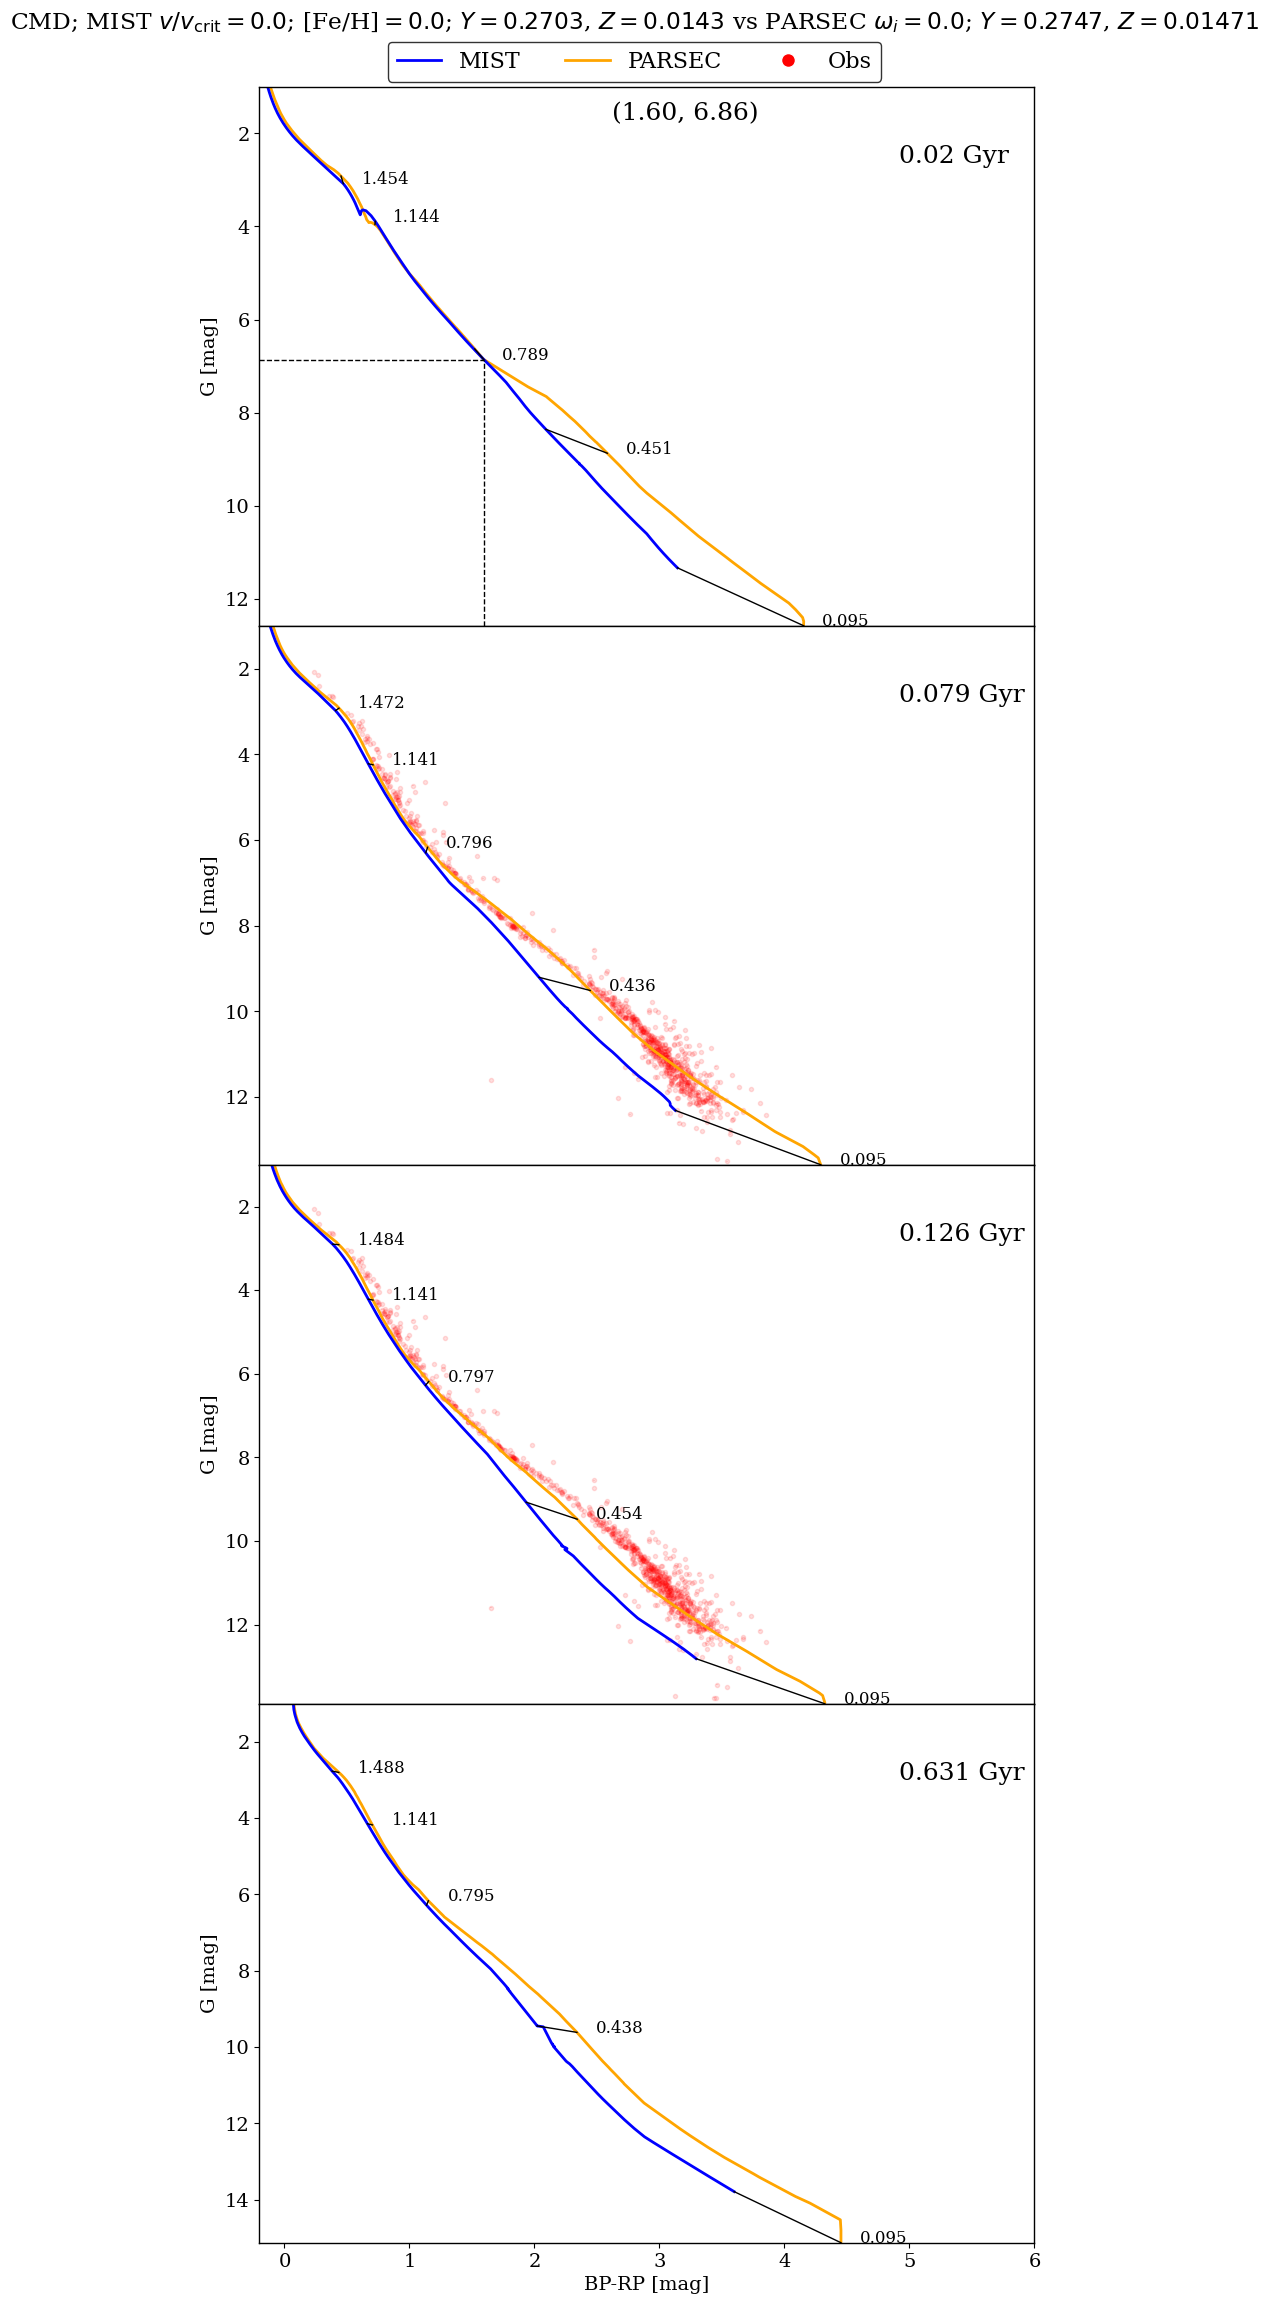

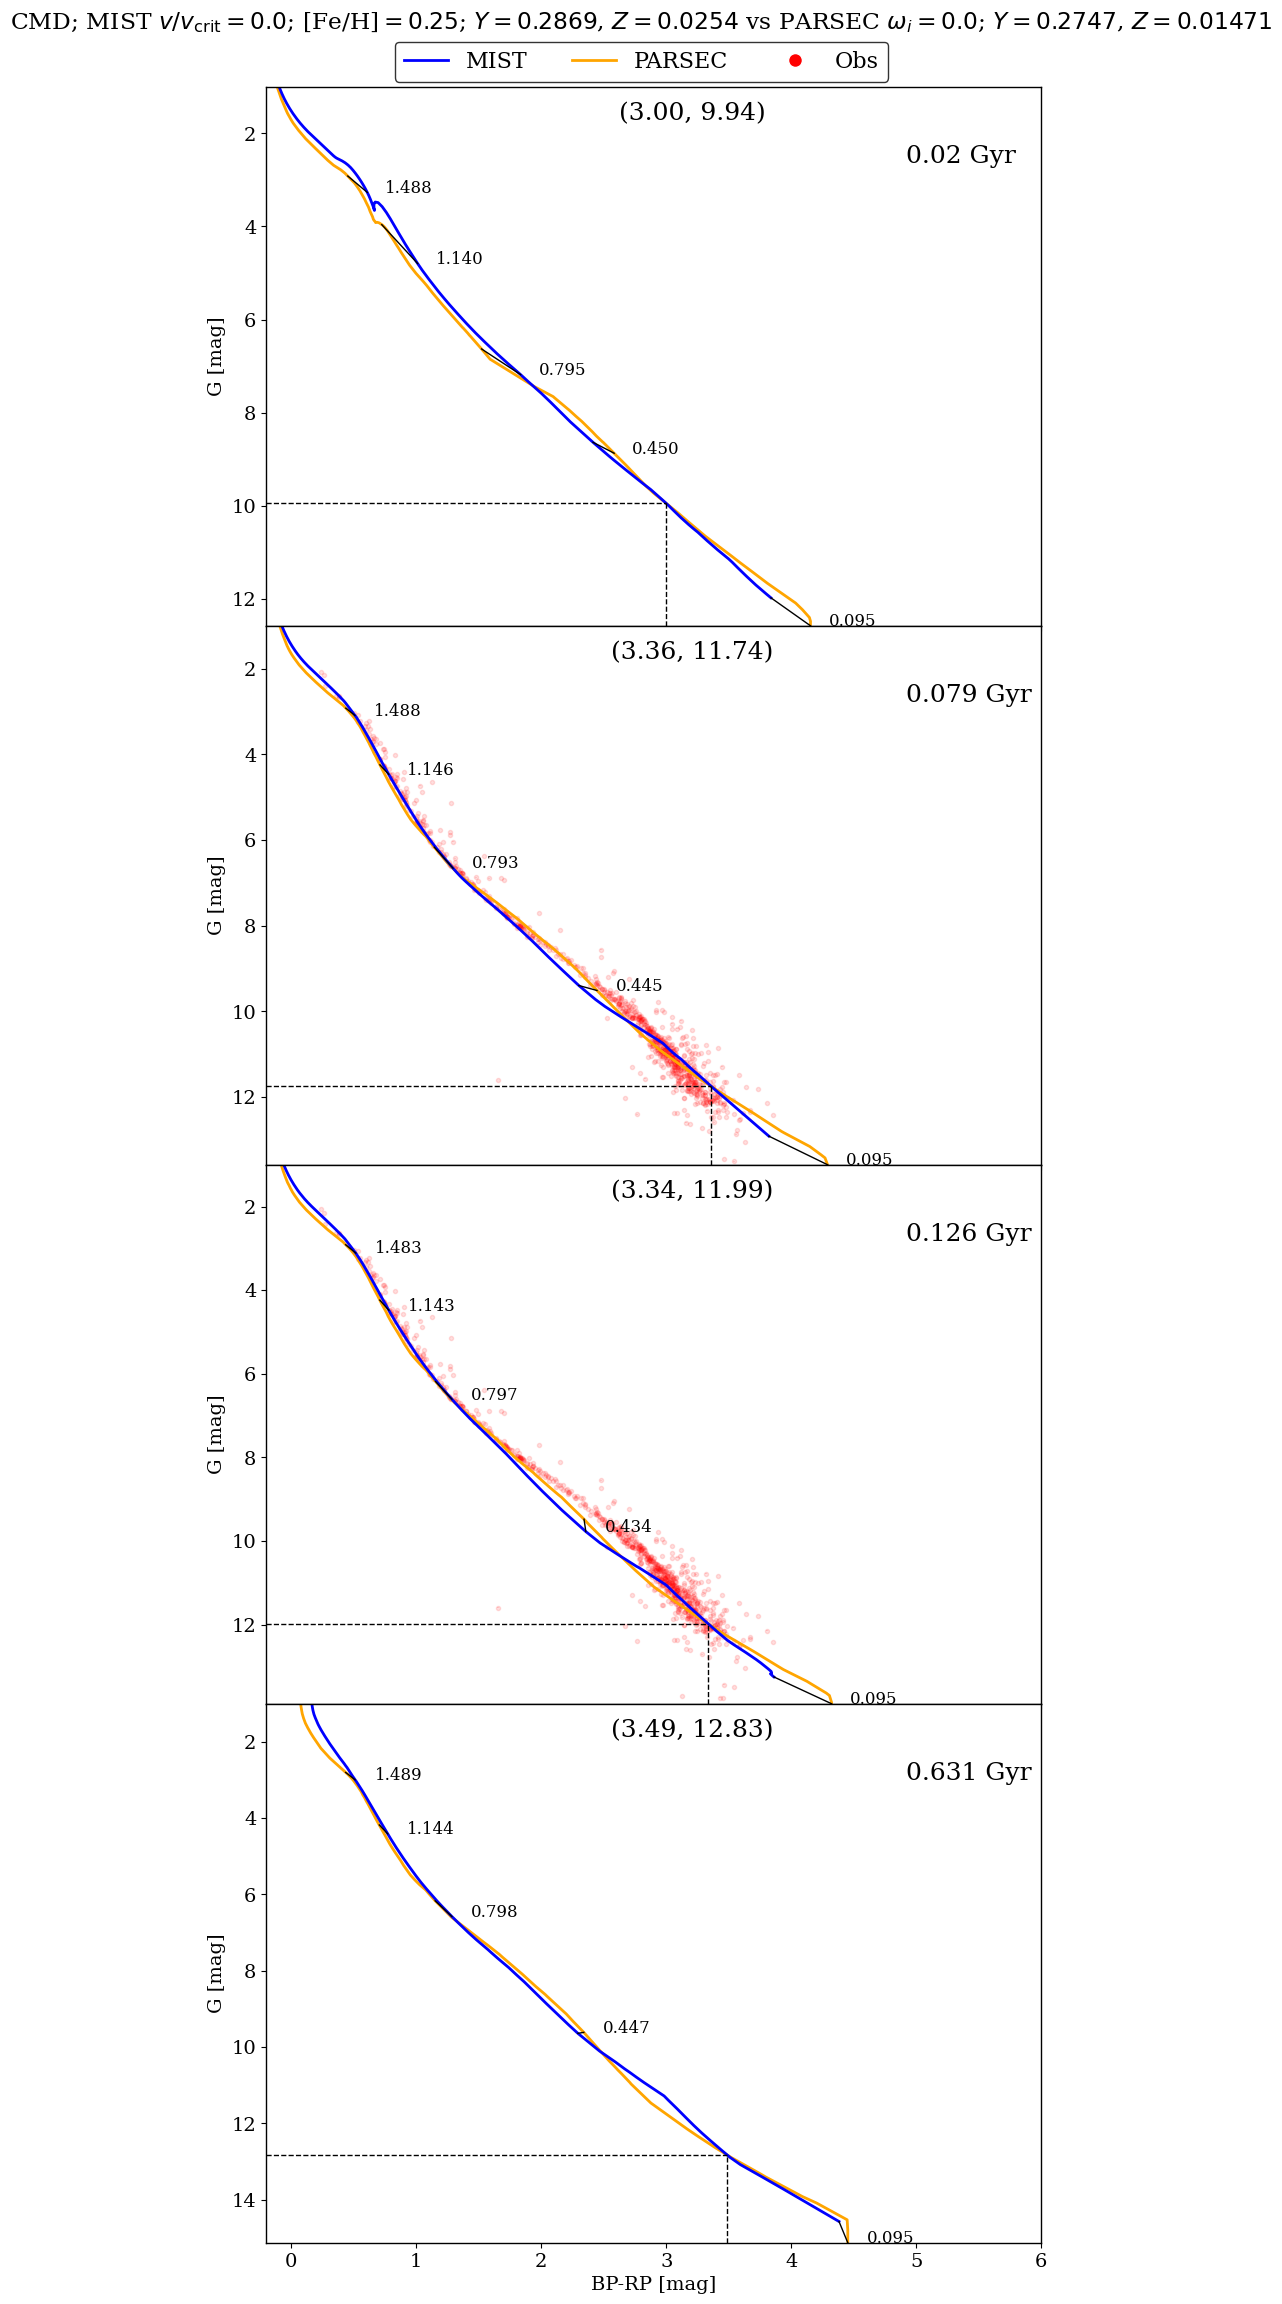

In [203]:

plot_single_column(MIST_FULL, PARSEC_iso_omega_00_sun_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.0$; $Y= 0.2703$, $Z=0.0143$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_color_x11', dpi=350, data_obs=data_obs_Pleiades, obs=True)
plot_single_column(MIST_FULL_2, PARSEC_iso_omega_00_sun_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.25$; $Y= 0.2869$, $Z=0.0254$', r'PARSEC $\omega_i=0.0$; $Y=0.2612$, $Z=0.007135$', filename='model_color_x21', dpi=350, data_obs=data_obs_Pleiades, obs=True)
plot_single_column(MIST_FULL, PARSEC_iso_omega_00_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.0$; $Y= 0.2703$, $Z=0.0143$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_color_x12', dpi=350, data_obs=data_obs_Pleiades, obs=True)
plot_single_column(MIST_FULL_2, PARSEC_iso_omega_00_Phot_dict, ['BP','RP', 'G'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['bp', 'rp', 'g'], r'MIST $v/v_{\rm crit}=0.0$; [Fe/H]$=0.25$; $Y= 0.2869$, $Z=0.0254$', r'PARSEC $\omega_i=0.0$; $Y=0.2747$, $Z=0.01471$', filename='model_color_x22', dpi=350, data_obs=data_obs_Pleiades, obs=True)